<a href="https://colab.research.google.com/github/sungjin-kim-data/vgames2_data/blob/master/vgames2_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **성진이가 다니고 있는 게임 회사**

## **게임 데이터를 확인 후 액션이 어떻게 이루어져야하는지 확인할 것**

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답
3. 출고량의 높은 게임에 대한 분석 및 시각화 프로세스 포함

=> 결론 : 다음 분기에 어떤 게임을 설계해야 하는지를 제시하셔야 합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# import matplotlib.font_manager as fm
# fm.fontManager.ttflist
# [f.name for f in fm.fontManager.ttflist]

In [ ]:
# 데이터 불러오기
gd = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
gd.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
# columns 소문자로 변경

gd.columns = gd.columns.str.lower()
gd.columns

Index(['unnamed: 0', 'name', 'platform', 'year', 'genre', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
      dtype='object')

In [ ]:
gd

,unnamed: 0,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


columns

  - Name : 게임의 이름
  - Platform : 게임이 지원되는 플랫폼의 이름
  - Year : 게임이 출시된 연도
  - Genre : 게임의 장르
  - Publisher : 게임을 제작한 회사
  - NA_Sales : 북미지역에서의 출고량
  - EU_Sales : 유럽지역에서의 출고량
  - JP_Sales : 일본지역에서의 출고량
  - Other_Sales : 기타지역에서의 출고량

## **데이터 확인 및 정제**

In [ ]:
# 필요없는 컬럼 제거
gd.drop('unnamed: 0', axis=1,inplace=True)

In [ ]:
# 정보 확인
gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         16598 non-null  object 
 1   platform     16598 non-null  object 
 2   year         16327 non-null  float64
 3   genre        16548 non-null  object 
 4   publisher    16540 non-null  object 
 5   na_sales     16598 non-null  object 
 6   eu_sales     16598 non-null  object 
 7   jp_sales     16598 non-null  object 
 8   other_sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# object describe
gd.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,name,platform,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
count,16598,16598,16548,16540,16598,16598,16598,16598
unique,11493,31,12,578,494,363,282,190
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts,0,0,0,0
freq,12,2163,3305,1351,4443,5665,10333,6386


In [ ]:
# gd 내용 정리해서 출력

print("총 데이터 수 :", gd.shape[0]*gd.shape[1])
print("총 결측치 수 : {} / 전체 데이터의 {:.2f}%".format(gd.isnull().sum().sum(), (gd.isnull().sum().sum()*100)/(gd.shape[0]*gd.shape[1])))
print("전체 게임 수: ", gd.name.nunique())
print("전체 플랫폼의 수: ", gd.platform.nunique())

총 데이터 수 : 149382
총 결측치 수 : 379 / 전체 데이터의 0.25%
전체 게임 수:  11493
전체 플랫폼의 수:  31


In [ ]:
# 결측치 확인
gd.isnull().sum(axis=0)

name             0
platform         0
year           271
genre           50
publisher       58
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
dtype: int64

In [ ]:
# 총 379개의 결측치 존재 전체 데이터의 0.25% 차지 그렇기에 결측치를 제거하여도 분석에 그렇게 크게 영향을 미칠것으로 판단되지 않음
# 즉, 결측치는 제거하는 것으로 판다

In [ ]:
# 결측치 컬럼 내용 확인
gd[gd.isnull().any(axis=1)].head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01


In [ ]:
gd1 = gd.dropna()
gd1 = gd1.reset_index(drop=True)
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         16241 non-null  object 
 1   platform     16241 non-null  object 
 2   year         16241 non-null  float64
 3   genre        16241 non-null  object 
 4   publisher    16241 non-null  object 
 5   na_sales     16241 non-null  object 
 6   eu_sales     16241 non-null  object 
 7   jp_sales     16241 non-null  object 
 8   other_sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 결측치 정상 제거 확인
gd1.isnull().sum()

name           0
platform       0
year           0
genre          0
publisher      0
na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
dtype: int64

In [ ]:
# Year int로 변경
gd1['year'] = gd1['year'].astype('int64')
gd1.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         16241 non-null  object
 1   platform     16241 non-null  object
 2   year         16241 non-null  int64 
 3   genre        16241 non-null  object
 4   publisher    16241 non-null  object
 5   na_sales     16241 non-null  object
 6   eu_sales     16241 non-null  object
 7   jp_sales     16241 non-null  object
 8   other_sales  16241 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
# 음수 값 확인
print(min(gd1['na_sales']), max(gd1['na_sales']))
print(min(gd1['eu_sales']), max(gd1['eu_sales']))
print(min(gd1['jp_sales']), max(gd1['jp_sales']))
print(min(gd1['other_sales']), max(gd1['other_sales']))

0 90K
0 960K
0 90K
0 80K


In [ ]:
# Year int로 변경
gd1['year'] = gd1['year'].astype('int64')
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# year 정제
gd1.query('year < 10')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
758,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1001,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
1204,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25
1343,LEGO Star Wars II: The Original Trilogy,PS2,6,Action,LucasArts,1.85,0.64,0.01,0.19
1388,Rogue Warrior,PS3,9,Shooter,Bethesda Softworks,0.11,0.02,0,0.01
1656,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8,Action,THQ,0.29,0.22,0,0.07
2206,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0,0.09
2408,SOCOM: U.S. Navy SEALs Fireteam Bravo 2,PSP,6,Shooter,Sony Computer Entertainment,0.81,0.11,0,0.13
2421,Splat Renegade Paintball,XB,5,Sports,Take-Two Interactive,0.04,0.01,0,0


In [ ]:
# year 잘못 기입된 index 추출
year = gd1.query('year < 10').index
year

Int64Index([   72,   758,  1001,  1204,  1343,  1388,  1656,  2206,  2408,
             2421,  2497,  2790,  3051,  3671,  3801,  3995,  4644,  4698,
             5200,  6005,  6912,  7032,  7215,  7451,  7689,  7983,  8341,
             8412,  8507,  8591,  8735,  8751,  8902,  9094,  9143,  9700,
            10151, 10200, 10939, 11010, 12234, 12372, 13447, 13855, 14352,
            14930, 14933, 15105, 15173, 15273, 15756, 15801, 16042],
           dtype='int64')

In [ ]:
# 2000 추가
gd1.loc[year, 'year'] = 2000 + gd1.loc[year, 'year']

In [ ]:
# 2022 기준으로 2자리 숫 year 출력
gd1.query('year < 22')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
2965,Toaru Kagaku no Chou Denjihou,PSP,11,Adventure,Kadokawa Shoten,0,0,0.06,0
2988,Kamen Rider Battle: Ganbaride,DS,10,Strategy,Namco Bandai Games,0,0,0.14,0
3929,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1.3M,2.07,0.18,0.65
4229,Gunblade NY & L.A. Machineguns Arcade Hits Pack,Wii,10,Shooter,Sega,0.06,0.01,0,0.01
4625,NBA 2K15,PS4,14,Sports,Take-Two Interactive,1.46,0.54,0.01,0.37
5083,Omega Labyrinth,PSV,15,Role-Playing,D3Publisher,0,0,0.05,0
5824,F.E.A.R. 3,X360,11,Shooter,Warner Bros. Interactive Entertainment,0.3,0.11,0.01,0.04
5989,Kingdom Hearts: Birth by Sleep,PSP,10,Role-Playing,Square Enix,0.63,0.42,0.75,0.26


In [ ]:
year2 = gd1.query('year < 22').index
year2

Int64Index([  210,   299,  2965,  2988,  3929,  4229,  4625,  5083,  5824,
             5989,  6033,  6065,  6758,  7038,  7406,  7477,  8030,  8379,
             8664,  9109, 10199, 10410, 10596, 10703, 11037, 11283, 11712,
            12124, 12599, 14915, 15110, 15151, 15493],
           dtype='int64')

In [ ]:
# 2000 추가
gd1.loc[year2, 'year'] = 2000 + gd1.loc[year2, 'year']

In [ ]:
gd1.query('year < 22')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales


In [ ]:
# 마지막으로 1900년대 2자리 숫자 출력
gd1.query('year < 100')

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0,0,0.9,0
2383,Casper,PS,96,Adventure,Interplay,0.46,0.31,0,0.05
3423,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4274,Adventure Island,NES,86,Platform,Hudson Soft,0,0,1.05,0
4705,Virtua Cop,SAT,95,Shooter,Sega,0,0,0.62,0
4737,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0,0,0.42,0.03
10113,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0,0
10493,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11104,Super Fire ProWrestling X,SNES,95,Fighting,Human Entertainment,0,0,0.28,0


In [ ]:
year3 = gd1.query('year < 100').index
year3

Int64Index([   79,   894,  2383,  3423,  4274,  4705,  4737, 10113, 10493,
            11104, 14261, 14470, 15641, 16127],
           dtype='int64')

In [ ]:
gd1.loc[year3, 'year'] = 1900 + gd1.loc[year3, 'year']

In [ ]:
gd1.loc[year3]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
79,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.1,0.07,0,0.01
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Racing,ASCII Entertainment,0,0,0.9,0
2383,Casper,PS,1996,Adventure,Interplay,0.46,0.31,0,0.05
3423,Glover,N64,1998,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4274,Adventure Island,NES,1986,Platform,Hudson Soft,0,0,1.05,0
4705,Virtua Cop,SAT,1995,Shooter,Sega,0,0,0.62,0
4737,Mobile Suit Gundam,PS,1995,Action,Namco Bandai Games,0,0,0.42,0.03
10113,AeroFighters Assault,N64,1997,Action,Video System,0.15,0.04,0,0
10493,3D Baseball,PS,1996,Sports,BMG Interactive Entertainment,0.02,0.01,0,0
11104,Super Fire ProWrestling X,SNES,1995,Fighting,Human Entertainment,0,0,0.28,0


### 이제 sales를 정제하려고 한다 엑셀 대충 데이터를 확인 했을 때 K, M 
### 그리고 0.xx 같은 통합되어 있지 않은 데이터들이라 전부 통일시켜준다

In [ ]:
# salse의 경우 전부 백만 단위로 변경
pd.set_option('display.max_rows', 50)
# 먼저 na_sales 부터 시작
# 뒤에 K가 붙는 row 추출
gd1[gd1['na_sales'].str.endswith('K') == True]

# 0K라고 추출 했을 때 0K는 사실 뒤에 K라는 단위가 붙지만 첫번째 자리가 0인 것을 감안해 무의미한 데이터라고 간부 'K'를 전부

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
142,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
866,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,Strategy,Aqua Plus,0K,0,0.04,0
1071,Pro Evolution Soccer 2014,3DS,2013,Action,Konami Digital Entertainment,0K,0,0.19,0
...,...,...,...,...,...,...,...,...,...
15308,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0K,0.01,0,0
15846,Vin Diesel: Wheelman,PS3,2009,Racing,Ubisoft,120K,0.15,0,0.06
15978,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16137,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [ ]:
# K = 1000 변경
gd1['na_sales'] = gd1['na_sales'].str.replace("K", '000')

In [ ]:
# 변경 확인
gd1['na_sales'].iloc[10]

'480000'

In [ ]:
# M 문자열 삭제
gd1['na_sales'] = gd1['na_sales'].str.replace("M", '')

In [ ]:
# 다른 문자열 있는지 확인
gd1[gd1.na_sales.str.contains(r'[a-zA-Z]')]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales


In [ ]:
# 타입 변경 (float)
gd1 = gd1.astype({'na_sales':'float'})

In [ ]:
# 나머지rows 백만단위로 변경
k_error = gd1.query('na_sales < 1000').index
k_error

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16172)

In [ ]:
k_error

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16172)

In [ ]:
# 백만 단위로 전부 통일
gd1.loc[k_error, 'na_sales'] = 1000000 * gd1.loc[k_error, 'na_sales']

In [ ]:
# 타입 변경 (int) / 소수점 지우기
gd1 = gd1.astype({'na_sales':'int'})

In [ ]:
# 동일한 방법으로 [en_sales, jp_sales, other_sales] 변경
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,0.05,0.25,0.03


In [ ]:
# eu_sales
gd1[gd1['eu_sales'].str.endswith('K') == True]

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
125,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0,0K,0.01,0
135,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,40000,50K,0.04,0.02
494,New Super Luigi U,WiiU,2013,Platform,Nintendo,1270000,620K,0.18,0.16
959,Smarty Pants,Wii,2007,Misc,Electronic Arts,530000,760K,0,0.16
983,Clock Tower 3,PS2,2002,Adventure,Capcom,100000,80K,0.12,0.03
...,...,...,...,...,...,...,...,...,...
15771,Monsters vs. Aliens,PS3,2009,Action,Activision,210000,60K,0,0.03
15781,The Sims 2: Ikea Home Stuff,PC,2008,Simulation,Electronic Arts,0,70K,0,0.02
15809,The Suffering,PS2,2004,Action,Midway Games,200000,160K,0,0.05
16022,Kill.Switch,XB,2003,Shooter,Namco Bandai Games,180000,50K,0,0.01


In [ ]:
# K = 1000 변경
gd1['eu_sales'] = gd1['eu_sales'].str.replace("K", '000')

In [ ]:
# M 삭제
gd1['eu_sales'] = gd1['eu_sales'].str.replace("M", "")

In [ ]:
# 타입 변경 (float)
gd1 = gd1.astype({'eu_sales':'float'})

In [ ]:
# 나머지rows 백만단위로 변경
k_error1 = gd1.query('eu_sales < 1000').index
k_error1

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16176)

In [ ]:
# 백만 단위로 전부 통일
gd1.loc[k_error1, 'eu_sales'] = 1000000 * gd1.loc[k_error1, 'eu_sales']

In [ ]:
# 타입 변경 (int) / 소수점 지우기
gd1 = gd1.astype({'eu_sales':'int'})

In [ ]:
# jp_sales
# K = 1000
gd1['jp_sales'] = gd1['jp_sales'].str.replace("K", "000")

In [ ]:
# M 삭제
gd1['jp_sales'] = gd1['jp_sales'].str.replace("M", "")

In [ ]:
# float로 type 변경
gd1 = gd1.astype({'jp_sales':'float'})

In [ ]:
k_error2 = gd1.query('jp_sales < 1000').index
k_error2

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16231, 16232, 16233, 16234, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16202)

In [ ]:
# 백만 단위로 전부 통일
gd1.loc[k_error2, 'jp_sales'] = 1000000 * gd1.loc[k_error2, 'jp_sales']

In [ ]:
# int로 type 변경
gd1 = gd1.astype({'jp_sales':'int'})

In [ ]:
# other_sales
# K = 1000
gd1['other_sales'] = gd1['other_sales'].str.replace("K", "000")

In [ ]:
# M 삭제
gd1['other_sales'] = gd1['other_sales'].str.replace("M", "")

In [ ]:
# float로 type 변경
gd1 = gd1.astype({'other_sales':'float'})

In [ ]:
k_error3 = gd1.query('other_sales < 1000').index
k_error3

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16230, 16231, 16232, 16233, 16235, 16236, 16237, 16238, 16239,
            16240],
           dtype='int64', length=16193)

In [ ]:
# 백만 단위로 변경
gd1.loc[k_error3, 'other_sales'] = 1000000 * gd1.loc[k_error3, 'other_sales']

In [ ]:
# int로 type 변경
gd1 = gd1.astype({'other_sales':'int'})

In [ ]:
# sales 전부 백만 단위로 변경 
# total_sales columns 추가하여 전세계 단위 판매량 확인

gd1['total_sales'] = gd1['na_sales'] + gd1['eu_sales'] + gd1['jp_sales'] + gd1['other_sales']

In [ ]:
gd1

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


In [ ]:
gd1.sort_values(by='total_sales', ascending=False)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
7673,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
...,...,...,...,...,...,...,...,...,...,...
8659,Double Sequence: The Q-Virus Invasion,DS,2008,Puzzle,Zoo Digital Publishing,10000,0,0,0,10000
2823,Command & Conquer Collection,PC,2003,Strategy,Electronic Arts,10000,0,0,0,10000
2837,Red Ninja: End of Honor,XB,2005,Action,Vivendi Games,10000,0,0,0,10000
11632,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0,10000,0,0,10000


## **시각화**

In [ ]:
# 장르별 게임 수
x_genre = gd1['genre'].value_counts().index
y_genre = gd1['genre'].value_counts().values
colors = sns.color_palette('hls', len(x_genre))

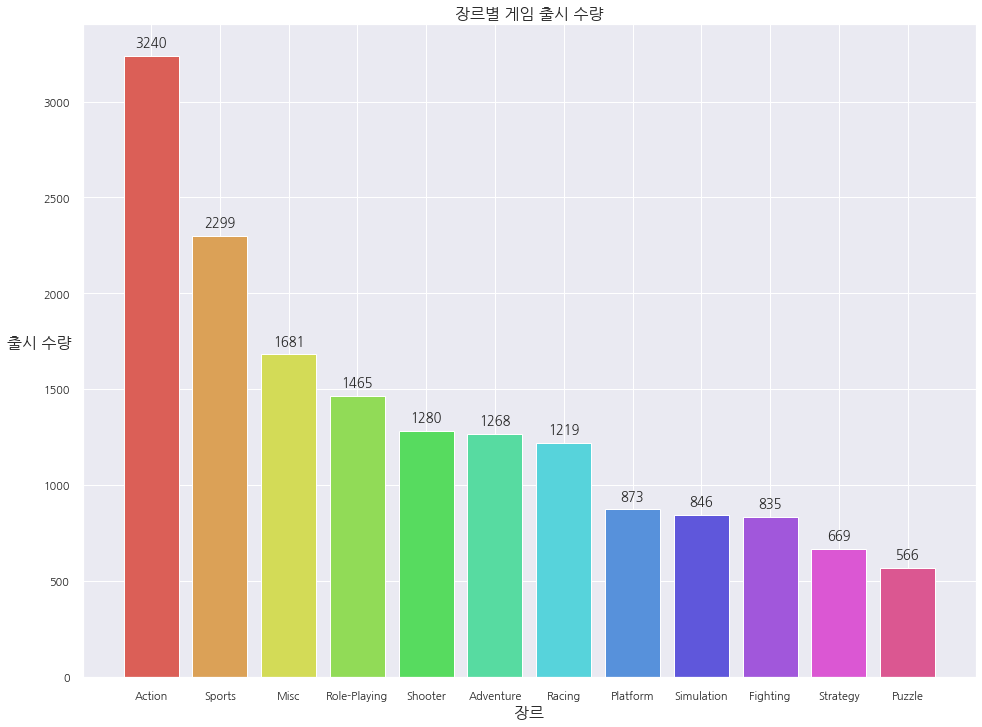

In [ ]:
plt.figure(figsize=(16, 12))

bar = plt.bar(x_genre, y_genre, color=colors)

for idx, rect in enumerate(bar):
  plt.text(idx, rect.get_height() + 50, y_genre[idx], ha='center', fontsize=13)
  
plt.title('장르별 게임 출시 수량', fontsize=16)
plt.xlabel('장르', fontsize=16)
plt.ylabel('출시 수량', rotation=0, fontsize=16)
plt.show()

In [ ]:
sizes = gd1['genre'].value_counts().values
values = gd1['genre'].value_counts().index
exp = [0.1 ,0 ,0  ,0 ,0  ,0 ,0  ,0 ,0  ,0 ,0 , 0]

plt.show()

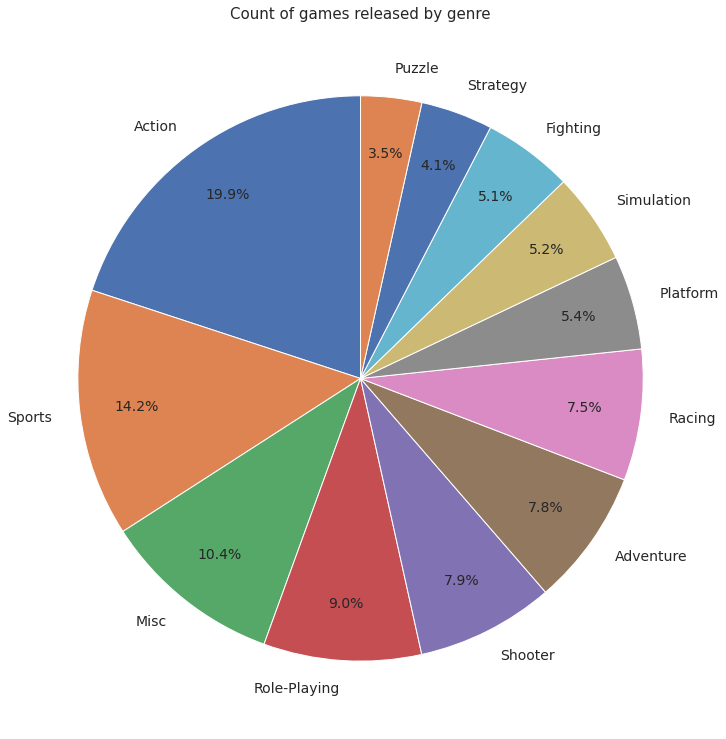

In [ ]:
plt.figure(figsize=(13, 13))

plt.pie(sizes, labels=values, startangle=90, autopct='%.1f%%', textprops={'fontsize': 14}, pctdistance=0.8)
plt.title('Count of games released by genre', fontsize=15)
plt.show()

In [ ]:
# 플랫폼별 게임 출시 수량
x_platform = gd1['platform'].value_counts().index
y_platform = gd1['platform'].value_counts().values
colors = sns.color_palette('hls', len(x_platform))

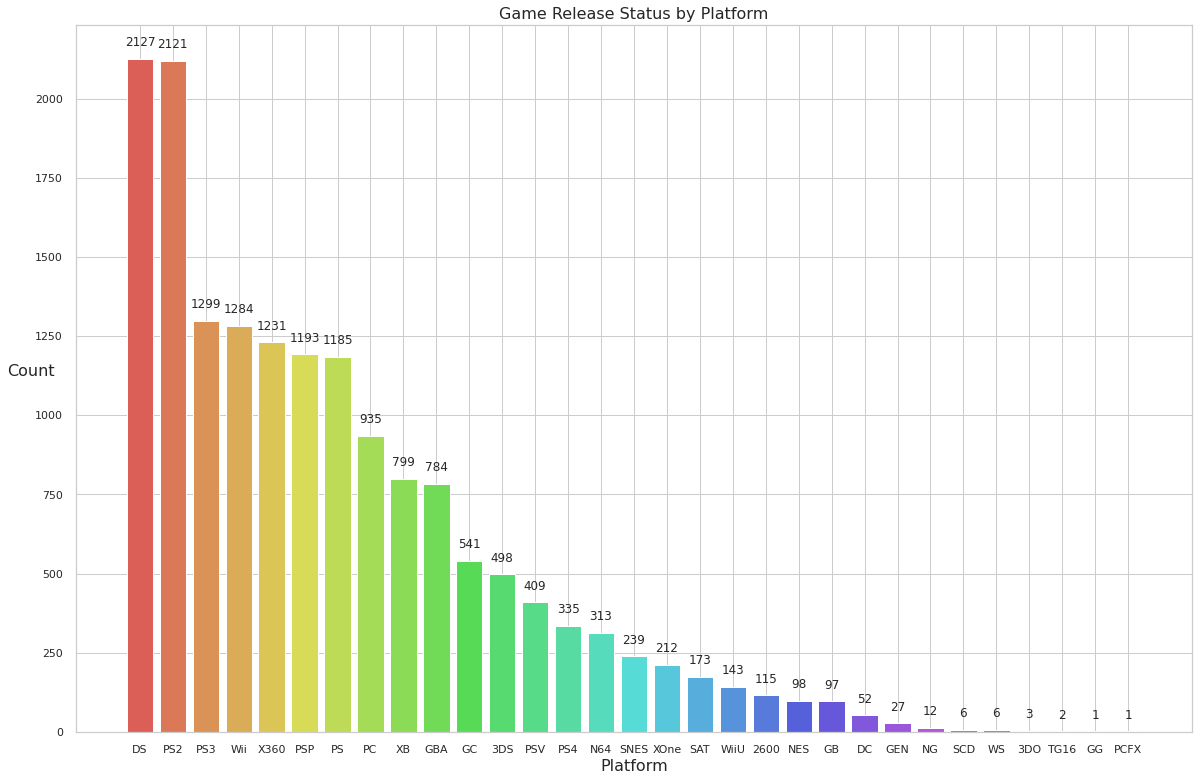

In [ ]:
plt.figure(figsize=(20, 13))
bar_platform = plt.bar(x_platform, y_platform, color=colors)

for idx, rect in enumerate(bar_platform):
  plt.text(idx, rect.get_height() + 40, y_platform[idx], ha='center')
plt.title('Game Release Status by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=16)
plt.ylabel('Count', rotation=0, fontsize=16)
plt.show()

In [ ]:
gd1.columns

Index(['name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'total_sales'],
      dtype='object')

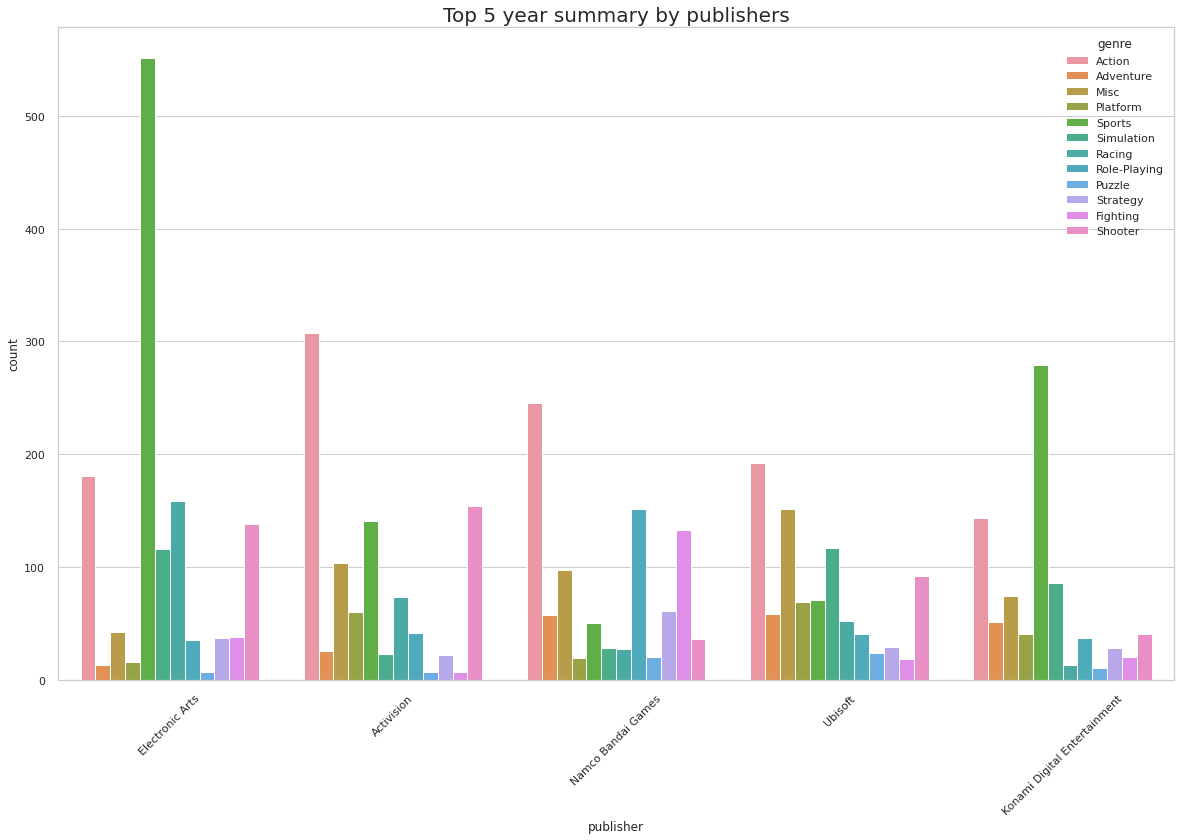

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x="publisher", data=gd1, hue='genre', order=gd1.publisher.value_counts().iloc[:5].index)
plt.title('Top 5 year summary by publishers', fontsize=20)
# plt.xlabel('연도')
# plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 2002년을 제외한 Top10 연도는 전부 액션 게임이 1등이다.

In [ ]:
# total_Sales
x_total_n = gd1.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_total_n = gd1.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].values

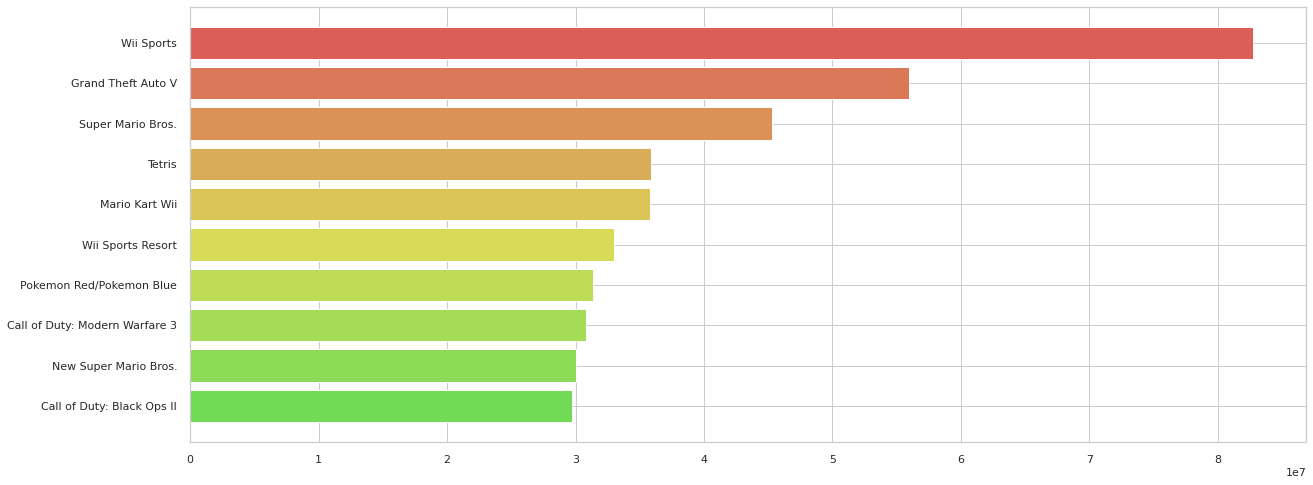

In [ ]:
# 전체 게임 판매량 순위 Top 10

plt.figure(figsize=(20, 8))

plt.barh(x_total_n, y_total_n, color=colors)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
top_game_sale = gd1
top_game_sale = top_game_sale[['name', 'year', 'genre', 'total_sales', 'publisher']]
top_game_sale = top_game_sale.sort_values(by=['total_sales'], ascending=False).iloc[:20]

In [ ]:
top_game_sale = gd1
top_game_sale = top_game_sale[['name', 'year', 'genre', 'total_sales', 'publisher']]
top_game_sale = top_game_sale.sort_values(by=['total_sales'], ascending=False).iloc[:20]

# top_game_sale

In [ ]:
x_name = gd1.sort_values(by='total_sales', ascending=False)['name'].iloc[:20].values
y_name  = gd1.sort_values(by='total_sales', ascending=False)['total_sales'].iloc[:20].values
y_lim = gd1.sort_values(by='total_sales', ascending=False)['year'].iloc[:20].values
y = np.arange(0, 20)
# print(x_name)
# print(y_name)
# print(y_lim)
text_genre = gd1.sort_values(by='total_sales', ascending=False)['genre'].iloc[:20].values

In [ ]:
x_name[1]

'Super Mario Bros.'

In [1]:
# # 일반적인 Total_sales로만 확인 했을 때 순위
# plt.figure(figsize=(20, 13))
# g = plt.bar(x_name, y_name, color=colors)

# for idx, rect in enumerate(g):
#   plt.text(idx, rect.get_height() - 18000000, str(x_name[idx] + ' ----- ' + str(text_genre[idx])), rotation=90, ha='center')

# plt.xticks(y, y_lim, fontsize=13)
# plt.ylim(0, 100000000)
# plt.show()

#**출고량이 높은 게임에 대한 분석 및 시각화 프로세스 포함**
 - 우리는 앞에서 액션과 스포츠가 가장 많은 출고량과 판매량을 보유하고있는 것을 확인하였습니다
 또한 게임 판매 순위 Top10을 보시더라도 1, 2위가 스포츠와 액션 장르의 게임이라는 것도 눈여겨 볼 수 있겠습니다.

그만큼 전 세계적으로 액션과 스포츠 장르에서 공급도 공급이지만 수요가 많다는 것을 확인할 수 있겠습니다.

In [ ]:
gd_genre = gd1[['genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
gd_map = gd_genre.groupby(by=['genre']).sum()
gd_map

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,858749997,513639997,156600000,183989998
Adventure,101790000,63660000,51870000,16700000
Fighting,220349998,99900000,87140000,36150000
Misc,394729999,208150000,104180000,72639999
Platform,445379999,200629999,130529999,51450000
Puzzle,121579999,50470000,56240000,12440000
Racing,354699997,235019999,56320000,76510000
Role-Playing,318759999,183089998,342929999,56730000
Shooter,574479997,310229996,38180000,101860000


In [ ]:
# plt.figure(figsize=(10, 8))
# sns.set(font_scale = 1)
# sns.heatmap(gd_map, annot=True, fmt='.0f')

# # plt.title('게임 장르별 판매량 비교')
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)
# plt.show()

In [ ]:
# 플랫폼 별 게임 장르 출시 현황 파악

action=gd1[gd1.genre=="Action"]
adventure=gd1[gd1.genre=="Adventure"]
fighting=gd1[gd1.genre=="Fighting"]
misc=gd1[gd1.genre=="Misc"]
platform=gd1[gd1.genre=="Platform"]
puzzle=gd1[gd1.genre=="Puzzle"]
racing=gd1[gd1.genre=="Racing"]
role_playing=gd1[gd1.genre=="Role-Playing"]
shooter=gd1[gd1.genre=="Shooter"]
simulation=gd1[gd1.genre=="Simulation"]
sports=gd1[gd1.genre=="Sports"]
strategy=gd1[gd1.genre=="Strategy"]

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

themes = cf.getThemes()
themes

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [ ]:
go1 = go.Histogram(
    x=action.platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
go2 = go.Histogram(
    x=adventure.platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(215,48,39)'))
go3 = go.Histogram(
    x=fighting.platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(244,109,67)'))
go4 = go.Histogram(
    x=misc.platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(253,174,97)'))
go5 = go.Histogram(
    x=platform.platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(254,224,144)'))
go6 = go.Histogram(
    x=puzzle.platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(170,253,87)'))
go7 = go.Histogram(
    x=racing.platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
go8 = go.Histogram(
    x=role_playing.platform,
    opacity=0.75,
    name = "Role-playing",
    marker=dict(color='rgb(116,173,209)'))
go9 = go.Histogram(
    x=shooter.platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(69,117,180)'))
go10 = go.Histogram(
    x=simulation.platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(49,54,149)'))
go11 = go.Histogram(
    x=sports.platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color="rgb(10,77,131)"))
go12 = go.Histogram(
    x=strategy.platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(1,15,139)'))

data = [go1, go2,go3,go4,go5,go6,go7,go8,go9,go10,go11,go12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to platform',
                   xaxis=dict(title='platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='#E6E6E6',
                   plot_bgcolor='#E6E6E6'
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_range=[0,2500])
iplot(fig)

In [ ]:
gd1.head(1)

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000


In [ ]:
# 위 데이터를 보면 PS2와 DS가 가장 많은 게임을 보유하고 있는 플랫폼임을 알 수 있습니다.

# 그럼 이제 플랫폼 별 판매량을 확인해보겠습니다.

In [ ]:
# groupby 설정

# action
x_action = action.groupby("platform")["total_sales"].sum().index
y_action = action.groupby("platform")["total_sales"].sum().values
# adventure
x_adventure = adventure.groupby("platform")['total_sales'].sum().index
y_adventure = adventure.groupby("platform")['total_sales'].sum().values
# fighting
x_fighting = fighting.groupby('platform')['total_sales'].sum().index
y_fighting = fighting.groupby('platform')['total_sales'].sum().values
# misc
x_misc = misc.groupby('platform')['total_sales'].sum().index
y_misc = misc.groupby('platform')['total_sales'].sum().values
# platform
x_platform = platform.groupby('platform')['total_sales'].sum().index
y_platform = platform.groupby('platform')['total_sales'].sum().values
# puzzle
x_puzzle = puzzle.groupby('platform')['total_sales'].sum().index
y_puzzle = puzzle.groupby('platform')['total_sales'].sum().values
# racing
x_racing = racing.groupby('platform')['total_sales'].sum().index
y_racing = racing.groupby('platform')['total_sales'].sum().values
# role-playing
x_role_playing = role_playing.groupby('platform')['total_sales'].sum().index
y_role_playing = role_playing.groupby('platform')['total_sales'].sum().values
# shooter
x_shooter = shooter.groupby('platform')['total_sales'].sum().index
y_shooter = shooter.groupby('platform')['total_sales'].sum().values
# simulation
x_simulation = simulation.groupby('platform')['total_sales'].sum().index
y_simulation = simulation.groupby('platform')['total_sales'].sum().values
# sports
x_sports = sports.groupby('platform')['total_sales'].sum().index
y_sports = sports.groupby('platform')['total_sales'].sum().values
# strategy
x_strategy = strategy.groupby('platform')['total_sales'].sum().index
y_strategy = strategy.groupby('platform')['total_sales'].sum().values

print(x_shooter)
print(y_shooter)

Index(['2600', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'N64', 'NES', 'PC',
       'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SNES', 'TG16', 'Wii',
       'WiiU', 'X360', 'XB', 'XOne'],
      dtype='object', name='platform')
[ 22960000   1230000    330000   8100000   1190000   3560000  13610000
    130000  19259999  35620000  43329999  39329999 108200000 195790000
  75319998  19800000   4590000   3970000   6060000     20000  26160000
   6160000 277139999  61300000  51589999]


In [ ]:
go1 = go.Bar(
    x = x_action,
    y = y_action,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
go2 = go.Bar(
    x = x_adventure,
    y = y_adventure,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(215,48,39)'))
go3 = go.Bar(
    x = x_fighting,
    y = y_fighting,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(244,109,67)'))
go4 = go.Bar(
    x = x_misc,
    y = y_misc,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(253,174,97)'))
go5 = go.Bar(
    x = x_platform,
    y = y_platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(254,224,144)'))
go6 = go.Bar(
    x = x_puzzle,
    y = y_puzzle,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(170,253,87)'))
go7 = go.Bar(
    x = x_racing,
    y = y_racing,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
go8 = go.Bar(
    x = x_role_playing,
    y = y_role_playing,
    opacity=0.75,
    name = "Role-playing",
    marker=dict(color='rgb(116,173,209)'))
go9 = go.Bar(
    x = x_shooter,
    y = y_shooter,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(69,117,180)'))
go10 = go.Bar(
    x = x_simulation,
    y = y_simulation,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(49,54,149)'))
go11 = go.Bar(
    x = x_sports,
    y = y_sports,
    opacity=0.75,
    name = "Sports", 
    marker=dict(color="rgb(10,77,131)"))
go12 = go.Bar(
    x = x_strategy,
    y = y_strategy,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(1,15,139)'))

data = [go1, go2,go3,go4,go5,go6,go7,go8,go9,go10,go11,go12]
layout = go.Layout(barmode='stack',
                   title='Total Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Total Sales(In Millions)'))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
x_year = gd1.groupby(by=['year'])['name'].count().sort_values(ascending=False).index
# y_year = gd1.groupby(by=['year'])['name'].count().sort_values(ascending=False).values
y_year = gd1.groupby(by=['year'])['name'].count().values
y = np.arange(0, 20)
print(y_year)
print(x_year)
gd1.sort_values(by='name').count()

[   8   46   36   17   14   14   21   16   15   17   16   41   43   60
  121  219  262  289  377  336  348  480  826  774  740  934 1005 1195
 1423 1428 1253 1133  652  545  580  611  342    3    1]
Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2012,
            2015, 2014, 2013, 2001, 1998, 2000, 2016, 1999, 1997, 1996, 1995,
            1994, 1993, 1981, 1992, 1991, 1982, 1986, 1989, 1983, 1987, 1990,
            1988, 1985, 1984, 1980, 2017, 2020],
           dtype='int64', name='year')


name           16241
platform       16241
year           16241
genre          16241
publisher      16241
na_sales       16241
eu_sales       16241
jp_sales       16241
other_sales    16241
total_sales    16241
dtype: int64

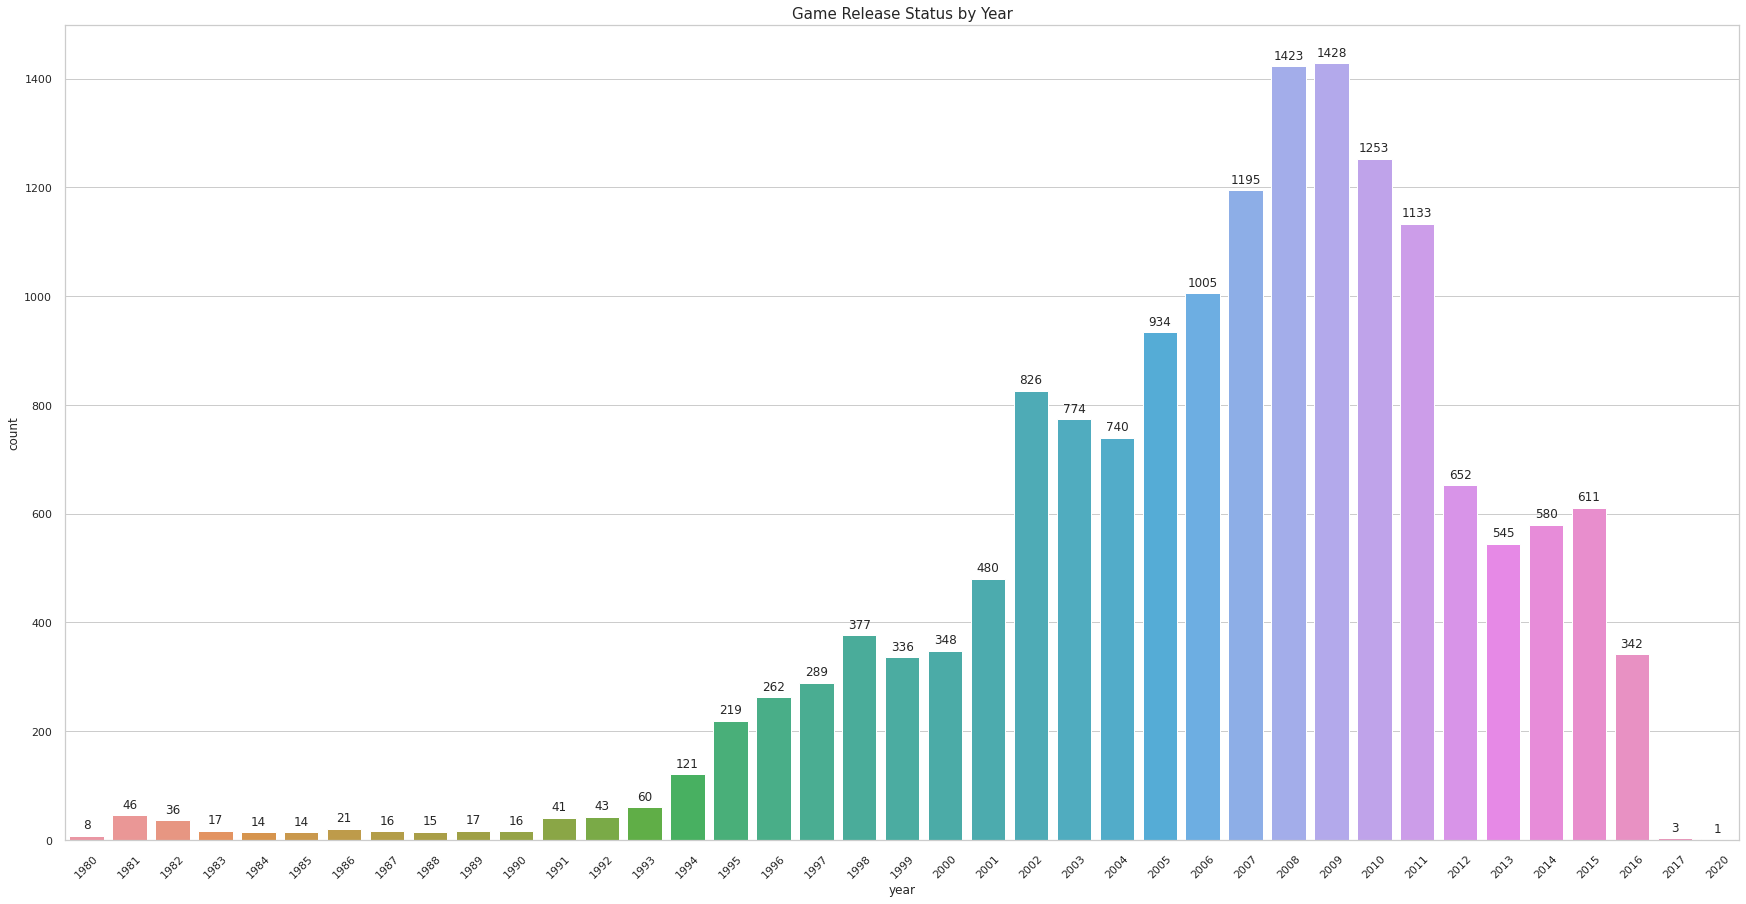

In [ ]:
plt.figure(figsize=(30, 15))
# g = sns.countplot(x="year", data=gd1, order = gd1.groupby(by=['year'])['name'].count().sort_values(ascending=False).index)
g = sns.countplot(x="year", data=gd1, order = gd1.groupby(by=['year'])['name'].count().index)

idx = 0
for value in y_year:
  g.text(idx, value + 13, y_year[idx], ha='center')
  idx += 1
plt.title('Game Release Status by Year', fontsize=15)
# plt.xlabel('연도', rotation=0)
# plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

#**연도별 게임의 트렌드가 있을까?**
A : 먼저 연도 별 게임 출고량을 확인해보겠습니다.
2001년부터 2009년까지 엄청난 상승세를 보여주고 있습니다.

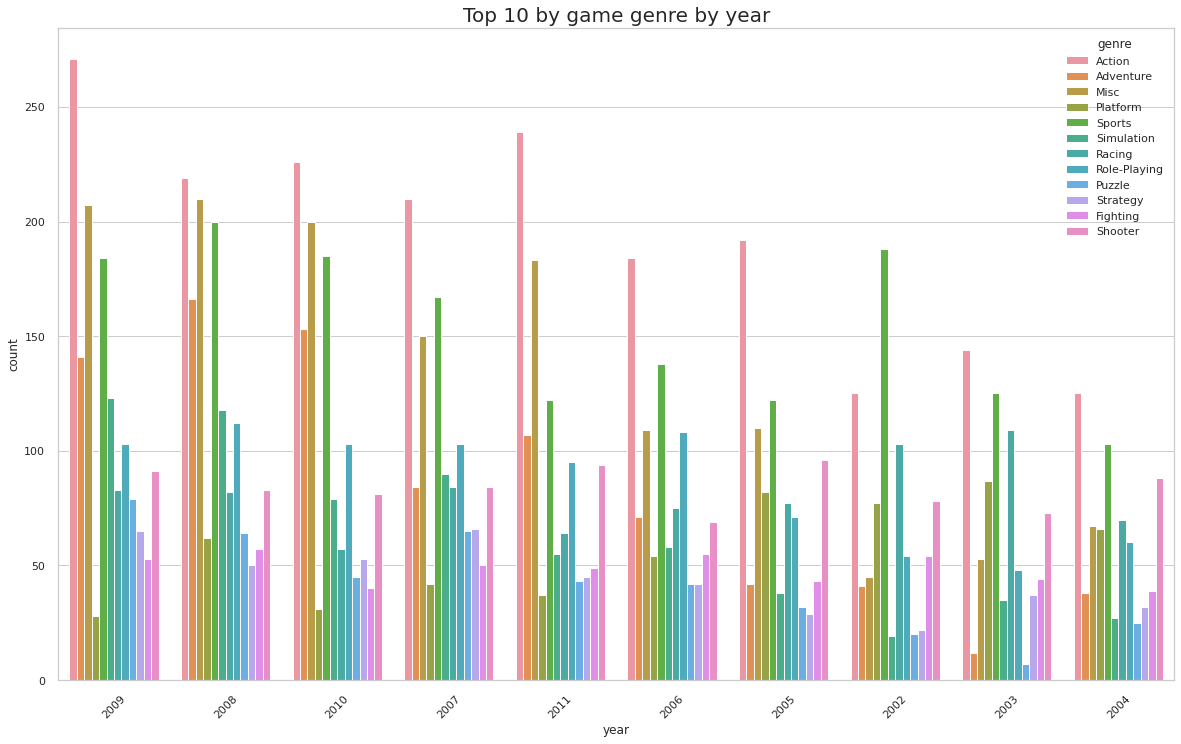

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x="year", data=gd1, hue='genre', order=gd1.year.value_counts().iloc[:10].index)
plt.title('Top 10 by game genre by year', fontsize=20)
# plt.xlabel('연도')
# plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

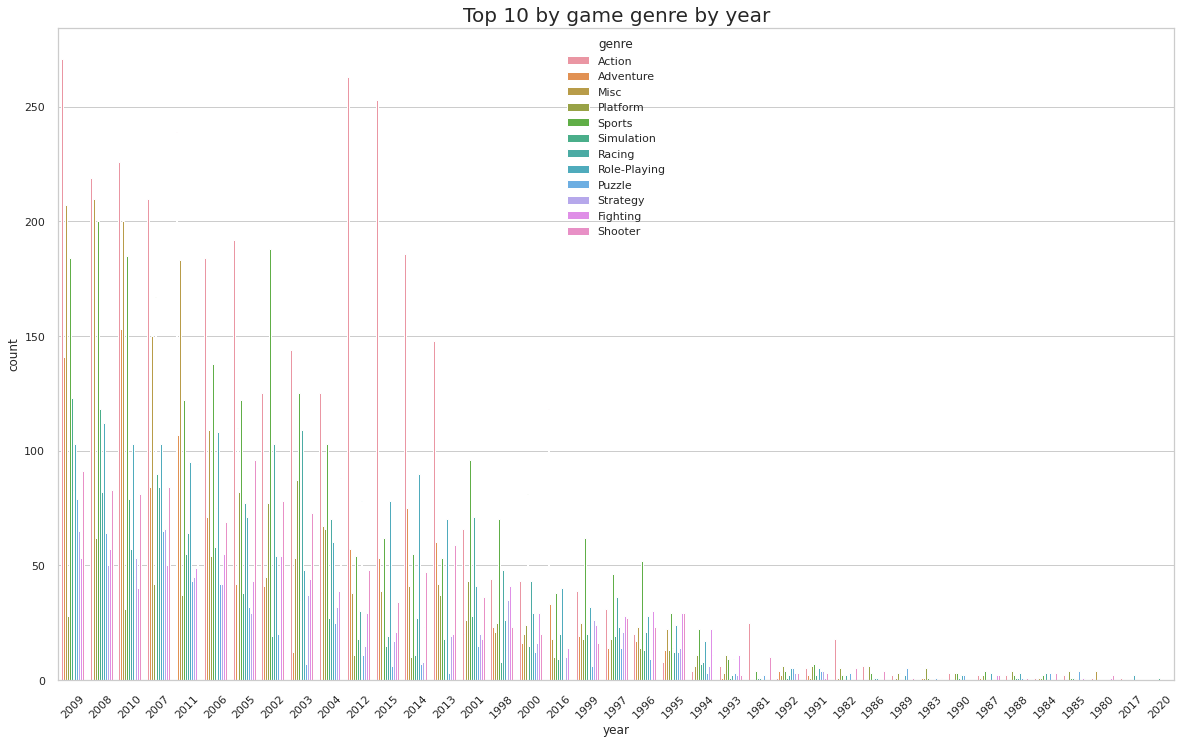

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x="year", data=gd1, hue='genre', order=gd1.year.value_counts().index)
plt.title('Top 10 by game genre by year', fontsize=20)
# plt.xlabel('연도')
# plt.ylabel('수량', rotation=0)
plt.xticks(rotation=45)
plt.show()

A : 그 다음 그래프를 보시게 되면 제일 출고량이 많았던 Top10 연도를 뽑아서 장르를 확인해보겠습니다.
2002년을 제외하고는 액션게임의 출고량이 가장 많은것을 확인할 수 있습니다.
그 뒤를 이어 Sports와 Misc도 많은 출고량이 있다는 걸 알 수 있었습니다.

In [ ]:
gd_year = gd1[['year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
gd_ymap = gd_year.groupby(by=['year']).sum()
gd_ymap = gd_ymap.reset_index()

In [ ]:
# Na_Sales
x_na = gd1.groupby('year')['na_sales'].sum().index
y_na = gd1.groupby('year')['na_sales'].sum().values
# Eu_Sales
x_eu = gd1.groupby('year')['eu_sales'].sum().index
y_eu = gd1.groupby('year')['eu_sales'].sum().values
# Jp_Sales
x_jp = gd1.groupby('year')['jp_sales'].sum().index
y_jp = gd1.groupby('year')['jp_sales'].sum().values
# Other_Sales
x_other = gd1.groupby('year')['other_sales'].sum().index
y_other = gd1.groupby('year')['other_sales'].sum().values

print(x_other)
print(y_other)

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='year')
[  110000   320000   310000   140000   700000   920000  1930000   200000
   990000  1500000  1400000   740000  1650000   890000  2200000  2640000
  7660000  9130000 11000000  9920000 11620000 22620000 27250000 25990000
 46920000 40489999 52690000 77530000 81689999 74680000 59140000 54330000
 37599999 39029999 40020000 29650000  7750000        0    20000]


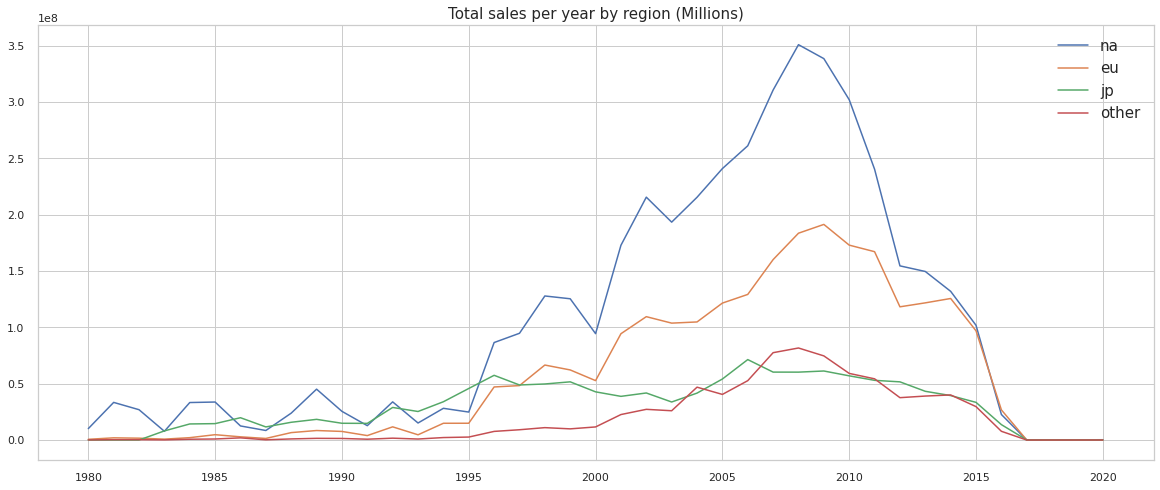

In [ ]:
plt.figure(figsize=(20, 8))

plt.plot(x_na, y_na, label='na')
plt.plot(x_eu, y_eu, label='eu')
plt.plot(x_jp, y_jp, label='jp')
plt.plot(x_other, y_other, label='other')

plt.title('Total sales per year by region (Millions)', fontsize=15)
plt.legend(fontsize=15)

plt.show()

In [ ]:
# groupby 설정

# action
x_action_y = action.groupby("year")["total_sales"].sum().index
y_action_y = action.groupby("year")["total_sales"].sum().values
# adventure
x_adventure_y = adventure.groupby("year")['total_sales'].sum().index
y_adventure_y = adventure.groupby("year")['total_sales'].sum().values
# fighting
x_fighting_y = fighting.groupby('year')['total_sales'].sum().index
y_fighting_y = fighting.groupby('year')['total_sales'].sum().values
# misc
x_misc_y = misc.groupby('year')['total_sales'].sum().index
y_misc_y = misc.groupby('year')['total_sales'].sum().values
# platform
x_platform_y = platform.groupby('year')['total_sales'].sum().index
y_platform_y = platform.groupby('year')['total_sales'].sum().values
# puzzle
x_puzzle_y = puzzle.groupby('year')['total_sales'].sum().index
y_puzzle_y = puzzle.groupby('year')['total_sales'].sum().values
# racing
x_racing_y = racing.groupby('year')['total_sales'].sum().index
y_racing_y = racing.groupby('year')['total_sales'].sum().values
# role-playing
x_role_playing_y = role_playing.groupby('year')['total_sales'].sum().index
y_role_playing_y = role_playing.groupby('year')['total_sales'].sum().values
# shooter
x_shooter_y = shooter.groupby('year')['total_sales'].sum().index
y_shooter_y = shooter.groupby('year')['total_sales'].sum().values
# simulation
x_simulation_y = simulation.groupby('year')['total_sales'].sum().index
y_simulation_y = simulation.groupby('year')['total_sales'].sum().values
# sports
x_sports_y = sports.groupby('year')['total_sales'].sum().index
y_sports_y = sports.groupby('year')['total_sales'].sum().values
# strategy
x_strategy_y = strategy.groupby('year')['total_sales'].sum().index
y_strategy_y = strategy.groupby('year')['total_sales'].sum().values

print(x_simulation_y)
print(y_simulation_y)

Int64Index([1981, 1985, 1988, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2020],
           dtype='int64', name='year')
[  440000    40000    30000  1130000  2150000  2140000   190000  2720000
  4170000 11330000  9640000  7110000 11460000  3370000 19540000 10819999
 21210000 10890000 49280000 21730000 48850000 46400000 33550000 21900000
 15310000 13369999  8680000  5540000  5610000   390000   290000]


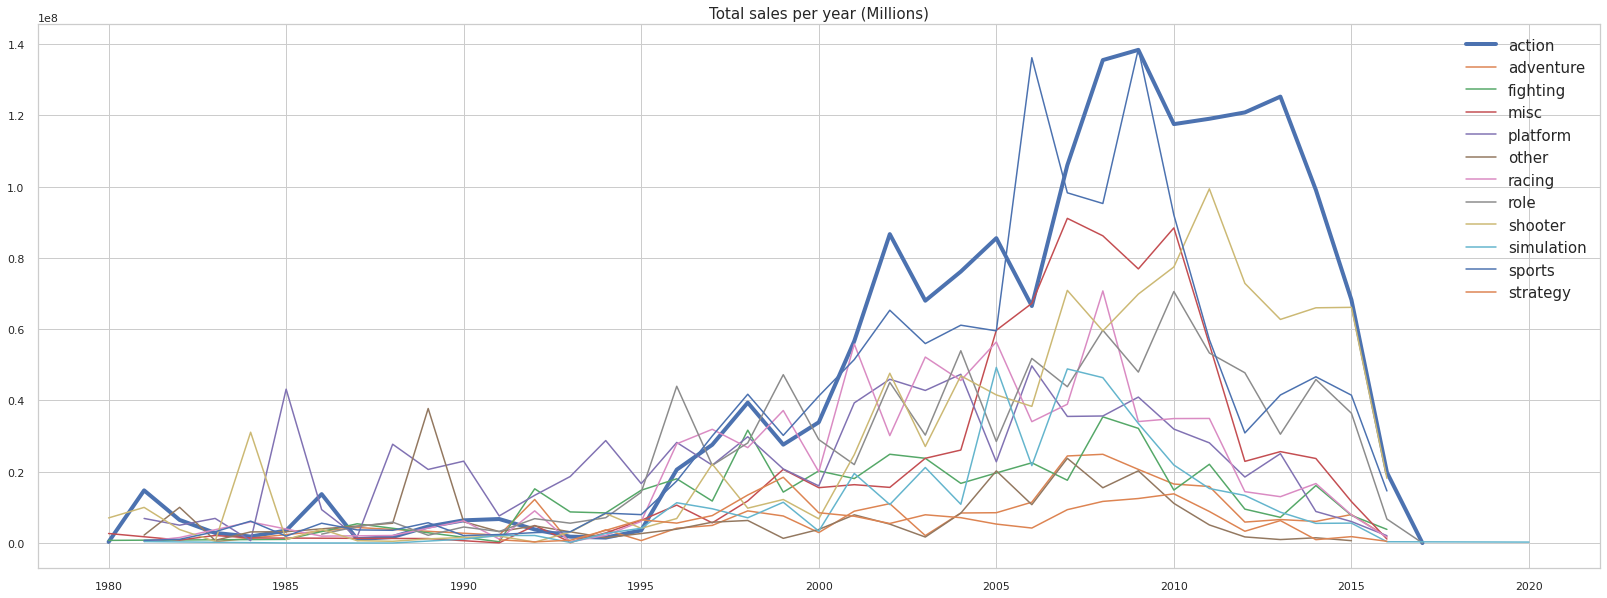

In [ ]:
plt.figure(figsize=(28, 10))

plt.plot(x_action_y, y_action_y, lw='4' ,label='action')
plt.plot(x_adventure_y, y_adventure_y, label='adventure')
plt.plot(x_fighting_y, y_fighting_y, label='fighting')
plt.plot(x_misc_y, y_misc_y, label='misc')
plt.plot(x_platform_y, y_platform_y, label='platform')
plt.plot(x_puzzle_y, y_puzzle_y, label='other')
plt.plot(x_racing_y, y_racing_y, label='racing')
plt.plot(x_role_playing_y, y_role_playing_y, label='role')
plt.plot(x_shooter_y, y_shooter_y, label='shooter')
plt.plot(x_simulation_y, y_simulation_y, label='simulation')
plt.plot(x_sports_y, y_sports_y, label='sports')
plt.plot(x_strategy_y, y_strategy_y, label='strategy')

plt.title('Total sales per year (Millions)', fontsize=15)
plt.legend(fontsize=15)

plt.show()

In [ ]:
go1 = go.Scatter(
    x = x_action_y,
    y = y_action_y,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
go2 = go.Scatter(
    x = x_adventure_y,
    y = y_adventure_y,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(215,48,39)'))
go3 = go.Scatter(
    x = x_fighting_y,
    y = y_fighting_y,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(244,109,67)'))
go4 = go.Scatter(
    x = x_misc_y,
    y = y_misc_y,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(253,174,97)'))
go5 = go.Scatter(
    x = x_platform_y,
    y = y_platform_y,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(254,224,144)'))
go6 = go.Scatter(
    x = x_puzzle_y,
    y = y_puzzle_y,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(170,253,87)'))
go7 = go.Scatter(
    x = x_racing_y,
    y = y_racing_y,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
go8 = go.Scatter(
    x = x_role_playing_y,
    y = y_role_playing_y,
    opacity=0.75,
    name = "Role-playing",
    marker=dict(color='rgb(116,173,209)'))
go9 = go.Scatter(
    x = x_shooter_y,
    y = y_shooter_y,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(69,117,180)'))
go10 = go.Scatter(
    x = x_simulation_y,
    y = y_simulation_y,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(49,54,149)'))
go11 = go.Scatter(
    x = x_sports_y,
    y = y_sports_y,
    opacity=0.75,
    name = "Sports", 
    marker=dict(color="rgb(10,77,131)"))
go12 = go.Scatter(
    x = x_strategy_y,
    y = y_strategy_y,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(1,15,139)'))

data = [go1, go2,go3,go4,go5,go6,go7,go8,go9,go10,go11,go12]
layout = go.Layout(barmode='stack',
                   title='Total sales per year (Millions)',
                   xaxis=dict(title='year'),
                   yaxis=dict( title='Total Sales(In Millions)'))

fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(type='category')
iplot(fig)

A : 장르별(연도) 정리한 그래프를 보시게 되면 출고량이 많았던 2000년부터 판매량 또한 늘어나고 있는걸 확인할 수 있습니다.

물들어올때 노를 잘 저었네요

2008, 2009 그래프를 보시면 되면 Sports, Action장르가 제일 판매량이 많습니다.
즉 출고량과 판매량이 비례하는걸 확인할 수 있었습니다.

In [ ]:
# Na_Sales
x_na_g = gd1.groupby('genre')['na_sales'].sum().index
y_na_g = gd1.groupby('genre')['na_sales'].sum().values
# Eu_Sales
x_eu_g = gd1.groupby('genre')['eu_sales'].sum().index
y_eu_g = gd1.groupby('genre')['eu_sales'].sum().values
# Jp_Sales
x_jp_g = gd1.groupby('genre')['jp_sales'].sum().index
y_jp_g = gd1.groupby('genre')['jp_sales'].sum().values
# Other_Sales
x_other_g = gd1.groupby('genre')['other_sales'].sum().index
y_other_g = gd1.groupby('genre')['other_sales'].sum().values

print(x_other_g)
print(y_other_g)

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='genre')
[183989998  16700000  36150000  72639999  51450000  12440000  76510000
  56730000 101860000  31320000 132349999  11230000]


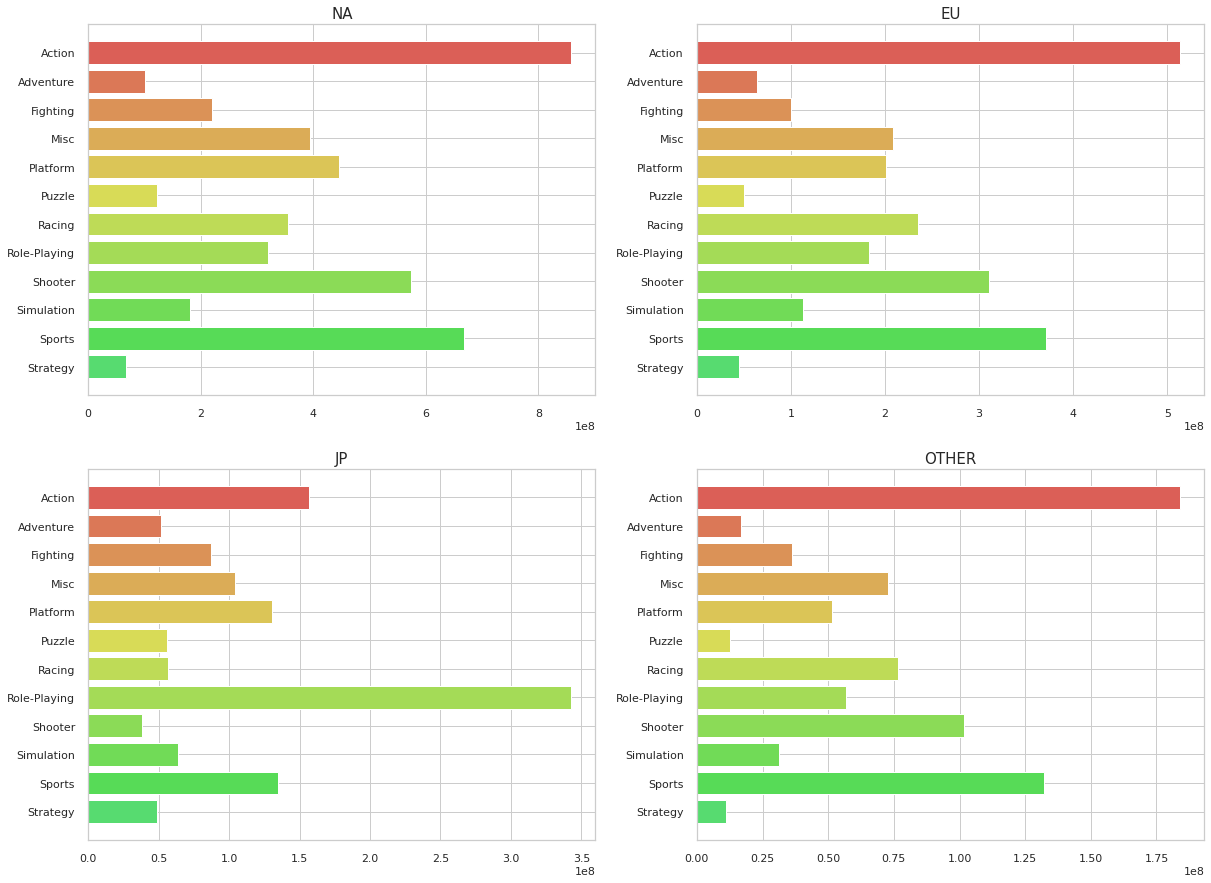

In [ ]:
# 4분할 차트
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# xlim 단위 통일
# NA
axs[0, 0].barh(x_na_g, y_na_g, color=colors)
axs[0, 0].set_title('NA', fontsize=15)
# axs[0, 0].set_xlim(0, 900000000)
axs[0, 0].invert_yaxis()

# EU
axs[0, 1].barh(x_eu_g, y_eu_g, color=colors)
axs[0, 1].set_title('EU', fontsize=15)
# axs[0, 1].set_xlim(0, 900000000)
axs[0, 1].invert_yaxis()

# JP
axs[1, 0].barh(x_jp_g, y_jp_g, color=colors)
axs[1, 0].set_title('JP', fontsize=15)
# axs[1, 0].set_xlim(0, 900000000)
axs[1, 0].invert_yaxis()

# OTHER
axs[1, 1].barh(x_other_g, y_other_g, color=colors)
axs[1, 1].set_title('OTHER', fontsize=15)
# axs[1, 1].set_xlim(0, 900000000)
axs[1, 1].invert_yaxis()

plt.show()

### **지역에 따라서 선호하는 게임 장르가 다를까?**

A : NA, EU, OTHER의 경우 action, sport, shooter 장르가 가장 압도적일 걸 볼 수 있습니다.
<br />
JP의 경우에는 재미있는 결과가 나온걸 확인할 수 있습니다.
앞에 봤던 3곳과는 달리 Role-Playing가 압도적으로 높은 걸로 나왔습니다.

이 시각화로 인해 우리는 각 나라가 어떠한 장르의 게임이 인기가 있는지 확인 할 수 있었습니다.

In [ ]:
# NA, EU, OTHER의 경우 대부분 action과 sports가 가장 앞도적으로 높았습니다.
# 일본의 경우에는 재미있는 결과가 나왔습니다.
# 액션 장르의 게임 보다 Role-Playing 장르의 판매량이 압도록적인 걸 볼 수 있겠습니다.

# 이로 인해 우리는 각 나라별 어떠한 장르가 있는가 있는 지를 확인 할 수 있었습니다.

In [ ]:
# Na_Sales
x_na_n = gd1.groupby('name')['na_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_na_n = gd1.groupby('name')['na_sales'].sum().sort_values(ascending=False).iloc[:10].values
# Eu_Sales
x_eu_n = gd1.groupby('name')['eu_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_eu_n = gd1.groupby('name')['eu_sales'].sum().sort_values(ascending=False).iloc[:10].values
# Jp_Sales
x_jp_n = gd1.groupby('name')['jp_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_jp_n = gd1.groupby('name')['jp_sales'].sum().sort_values(ascending=False).iloc[:10].values
# Other_Sales
x_other_n = gd1.groupby('name')['other_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_other_n = gd1.groupby('name')['other_sales'].sum().sort_values(ascending=False).iloc[:10].values

# total_Sales
x_total_n = gd1.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_total_n = gd1.groupby('name')['total_sales'].sum().sort_values(ascending=False).iloc[:10].values

print(y_total_n)

[82740000 55919998 45310000 35840000 35830000 33000000 31380000 30840000
 30010000 29730000]


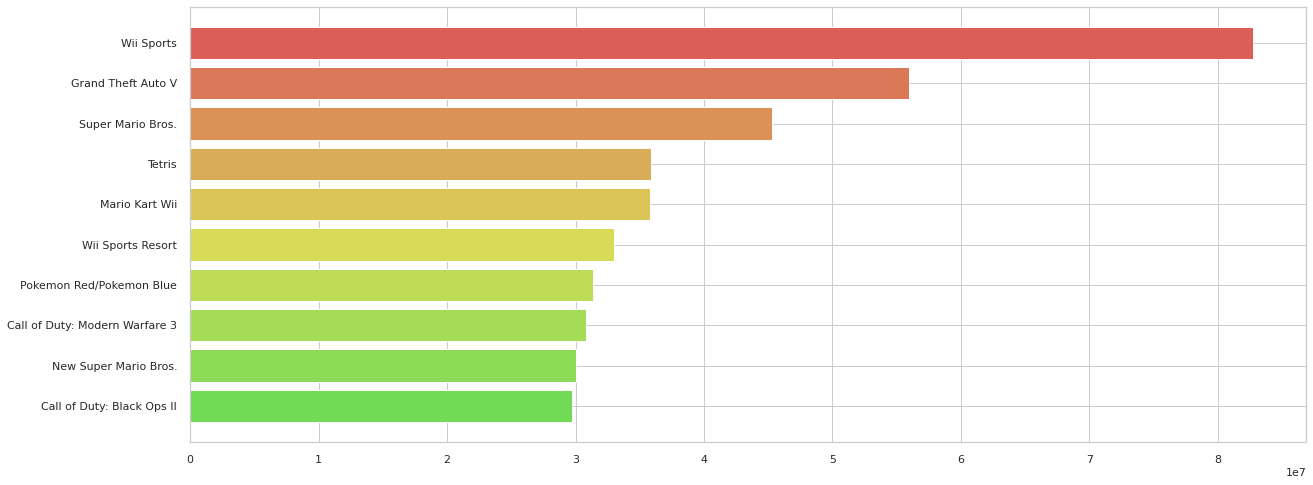

In [ ]:
plt.figure(figsize=(20, 8))

plt.barh(x_total_n, y_total_n, color=colors)
plt.gca().invert_yaxis()
plt.show()

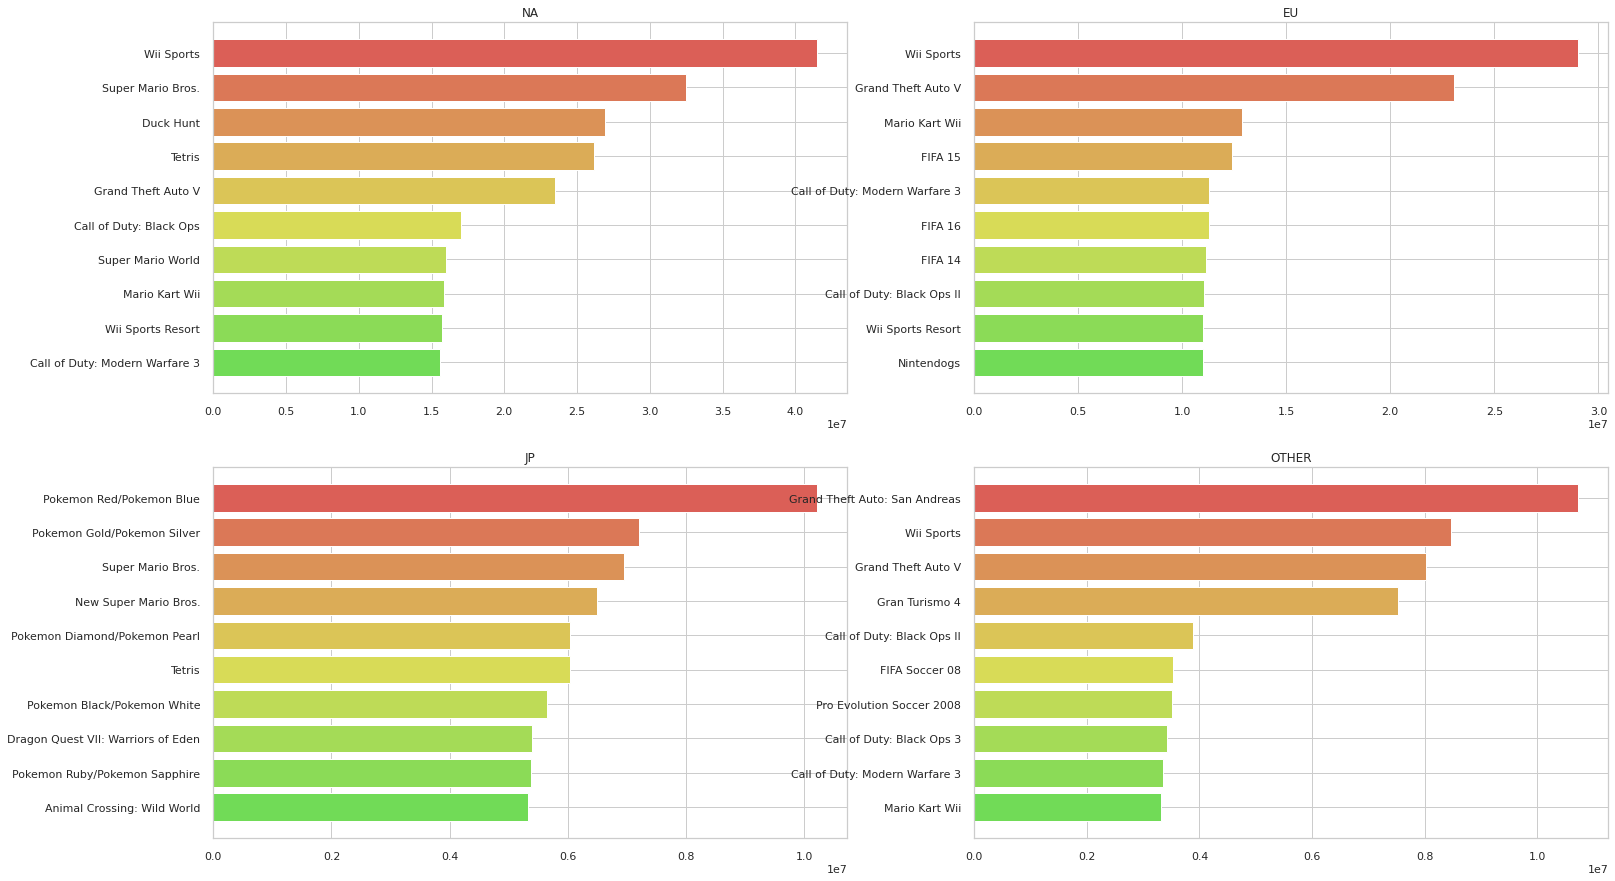

In [ ]:
import enum
# 각 나라별 게임 판매량 Top 10 이름

# 4분할 차트
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# xlim 단위 통일
# NA
na = axs[0, 0].barh(x_na_n, y_na_n, color=colors)
# for idx, rect in enumerate(na):
#   axs[0, 0].text(rect.get_height() + 13000000, idx + 0.1 ,na_genre[idx], ha='center', weight="bold")
axs[0, 0].set_title('NA')
# axs[0, 0].set_xlim(0, 50000000)
axs[0, 0].invert_yaxis()

# EU
eu = axs[0, 1].barh(x_eu_n, y_eu_n, color=colors)
# for idx, rect in enumerate(eu):
#   axs[0, 1].text(rect.get_height() + 7600000, idx + 0.1 ,eu_genre[idx], ha='center', weight="bold")
axs[0, 1].set_title('EU')
# axs[0, 1].set_xlim(0, 50000000)
axs[0, 1].invert_yaxis()

# JP
jp = axs[1, 0].barh(x_jp_n, y_jp_n, color=colors)
# for idx, rect in enumerate(jp):
#   axs[1, 0].text(rect.get_height() + 15000000, idx + 0.1 ,jp_genre[idx], ha='center', weight="bold")
axs[1, 0].set_title('JP')
# axs[1, 0].set_xlim(0, 50000000)
axs[1, 0].invert_yaxis()

# OTHER
other = axs[1, 1].barh(x_other_n, y_other_n, color=colors)
# for idx, rect in enumerate(other):
#   axs[1, 1].text(rect.get_height() + 15000000, idx + 0.1 ,other_genre[idx], ha='center', weight="bold")
axs[1, 1].set_title('OTHER')
# axs[1, 1].set_xlim(0, 50000000)
axs[1, 1].invert_yaxis()

plt.show()

### **지역에 따라서 역대 인기 게임은 무엇일까?**
A : 이전에 우리는 각 나라 별 인기 있는 장르를 확인 했습니다.

이번 차트를 보시면 위와 동일한 데이터 분포를 가지고 있는 차트는 JP, OTHER 인걸 확인할 수 있습니다. 확실히 JP의 경우네는 Top10안에 6개의 게임이 Role-Playing인걸 알 수 있습니다.
하지만 NA의 경우에는 오히려 ACTION이 가장 높은 판매량을 보였지만 오히려 게임의 판매량을 보면 Top1 10안에 ACTION이 없는 걸 확인할 수가 있습니다.

NA에 대해 조금 더 확인해보도록 하겠습니다.

In [ ]:
na_ns = gd1.groupby('name')['na_sales'].sum().sort_values(ascending=False)
x_na_ns = gd1.groupby('name')['na_sales'].sum().sort_values(ascending=False).index
y_na_ns = gd1.groupby('name')['na_sales'].sum().sort_values(ascending=False).values

name
Wii Sports                        41490000
Super Mario Bros.                 32480000
Duck Hunt                         26930000
Tetris                            26170000
Grand Theft Auto V                23460000
Call of Duty: Black Ops           17010000
Super Mario World                 15990000
Mario Kart Wii                    15850000
Wii Sports Resort                 15750000
Call of Duty: Modern Warfare 3    15580000
Kinect Adventures!                14970000
Call of Duty: Ghosts              14920000
New Super Mario Bros. Wii         14590000
Call of Duty: Black Ops II        14080000
Wii Play                          14030000
Call of Duty: Modern Warfare 2    13520000
Super Mario Bros. 3               12470000
Super Mario 64                    11990000
Call of Duty: Black Ops 3         11890000
Grand Theft Auto IV               11520000
Name: na_sales, dtype: int64

In [ ]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=x_na_ns[:10],
           y=y_na_ns[:10],
           name="Top 10",
          marker={'color': y_na_ns[:10],'colorscale': 'Earth'}))

fig.add_trace(
    go.Bar(x=x_na_ns[:30],
           y=y_na_ns[:30],
           name="Top 30",
           marker={'color': y_na_ns[:30],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=x_na_ns[:50],
           y=y_na_ns[:50],
           name="Top 50",
           marker={'color': y_na_ns[:50],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=x_na_ns[:100],
           y=y_na_ns[:100],
           name="Top 100",
           marker={'color': y_na_ns[:100],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=x_na_ns,
           y=y_na_ns,
           name="All",
           marker={'color': y_na_ns,'colorscale': 'Earth'},
               visible=False ))

buttons = []
tops = ['Top 10', 'Top 30', 'Top 50', 'Top 100', 'All']
for i, top in enumerate(tops):
    buttons.append(dict(
        label=top,
        method="update",
        # 버튼 클릭 시 변경 
        # ([True, Fales, Fales, Fales, False])
        # ([Fales, True, Fales, Fales, False])
        # ([Fales, Fales, True, Fales, False])
        # ([Fales, Fales, Fales, True, False])
        # ([Fales, Fales, Fales, False, True])
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              # sub title
              {"title": f"North America Game Sales {top}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
          )
    ])

fig.update_layout(
    # sup title
    title_text="North America Game Sales Rankings",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

### **North America 게임 판매량 확인**

In [ ]:
# Na_Sales
x_to_n = gd1.groupby('genre')['total_sales'].sum().sort_values(ascending=False).iloc[:10].index
y_to_n = gd1.groupby('genre')['total_sales'].sum().sort_values(ascending=False).iloc[:10].values

print(x_to_n)
print(y_to_n)

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Racing', 'Fighting', 'Simulation', 'Puzzle'],
      dtype='object', name='genre')
[1712979992 1305339993 1024749993  901509996  827989997  779699998
  722549996  443539998  389279998  240729999]


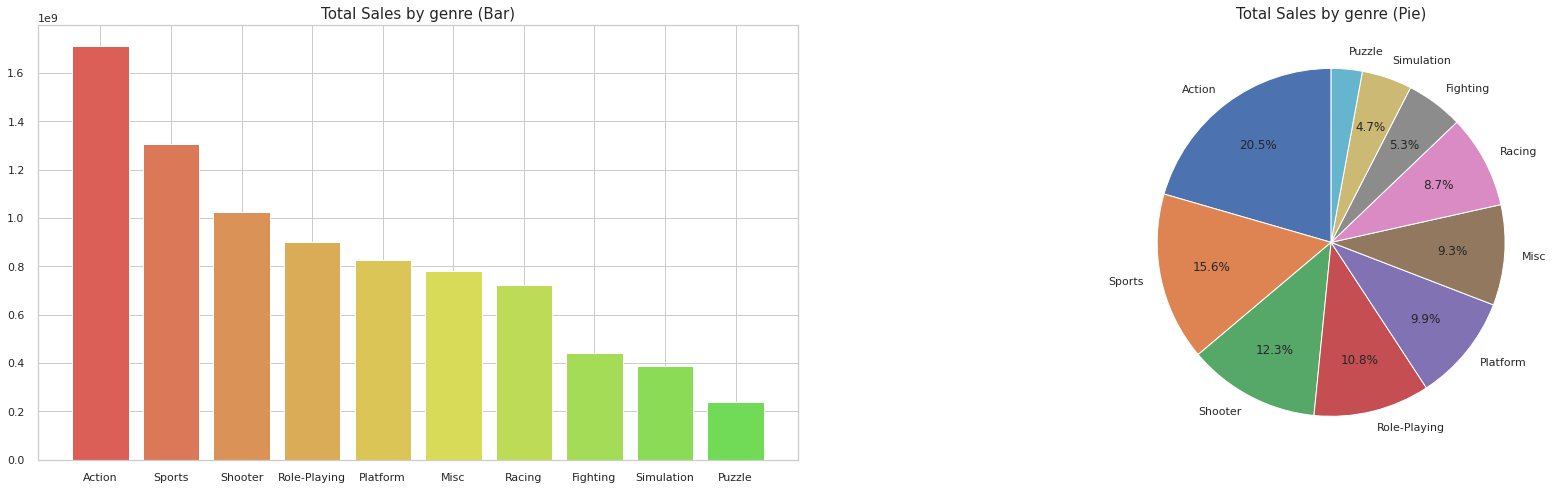

In [ ]:
plt.figure(figsize=(30, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
axs1.bar(x_to_n, y_to_n, color=colors)
axs1.set_title('Total Sales by genre (Bar)', fontsize=15)
# axs1.set_xticks(rotation=45)

# pie
# 4% 이하 출력 X
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 4 else ''

axs2.pie(y_to_n, labels=x_to_n, autopct=autopct, startangle=90, pctdistance=0.7)
axs2.set_title('Total Sales by genre (Pie)', fontsize=15)

plt.show()

In [ ]:
# 판매량이 제일 높은 게임 회사

# groupby 설정

# action
x_action_y = action.groupby("publisher")["total_sales"].sum().index
y_action_y = action.groupby("publisher")["total_sales"].sum().values
# adventure
x_adventure_y = adventure.groupby("publisher")['total_sales'].sum().index
y_adventure_y = adventure.groupby("publisher")['total_sales'].sum().values
# fighting
x_fighting_y = fighting.groupby('publisher')['total_sales'].sum().index
y_fighting_y = fighting.groupby('publisher')['total_sales'].sum().values
# misc
x_misc_y = misc.groupby('publisher')['total_sales'].sum().index
y_misc_y = misc.groupby('publisher')['total_sales'].sum().values
# platform
x_platform_y = platform.groupby('publisher')['total_sales'].sum().index
y_platform_y = platform.groupby('publisher')['total_sales'].sum().values
# puzzle
x_puzzle_y = puzzle.groupby('publisher')['total_sales'].sum().index
y_puzzle_y = puzzle.groupby('publisher')['total_sales'].sum().values
# racing
x_racing_y = racing.groupby('publisher')['total_sales'].sum().index
y_racing_y = racing.groupby('publisher')['total_sales'].sum().values
# role-playing
x_role_playing_y = role_playing.groupby('publisher')['total_sales'].sum().index
y_role_playing_y = role_playing.groupby('publisher')['total_sales'].sum().values
# shooter
x_shooter_y = shooter.groupby('publisher')['total_sales'].sum().index
y_shooter_y = shooter.groupby('publisher')['total_sales'].sum().values
# simulation
x_simulation_y = simulation.groupby('publisher')['total_sales'].sum().index
y_simulation_y = simulation.groupby('publisher')['total_sales'].sum().values
# sports
x_sports_y = sports.groupby('publisher')['total_sales'].sum().index
y_sports_y = sports.groupby('publisher')['total_sales'].sum().values
# strategy
x_strategy_y = strategy.groupby('publisher')['total_sales'].sum().index
y_strategy_y = strategy.groupby('publisher')['total_sales'].sum().values

# print(x_shooter_y)
# print(y_shooter_y)

In [ ]:
gd1.sort_values(by='total_sales', ascending=False)['publisher'].iloc[:20].values

array(['Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo',
       'Microsoft Game Studios', 'Take-Two Interactive',
       'Take-Two Interactive', 'Nintendo', 'Nintendo'], dtype=object)

In [ ]:
top_20_publisher = gd1.groupby(by=['publisher'])['year'].count().sort_values(ascending=False).head(20)
top_20_publisher = pd.DataFrame(top_20_publisher).reset_index()
x_top_publisher = top_20_publisher['publisher'].values
y_top_publisher = top_20_publisher['year'].values

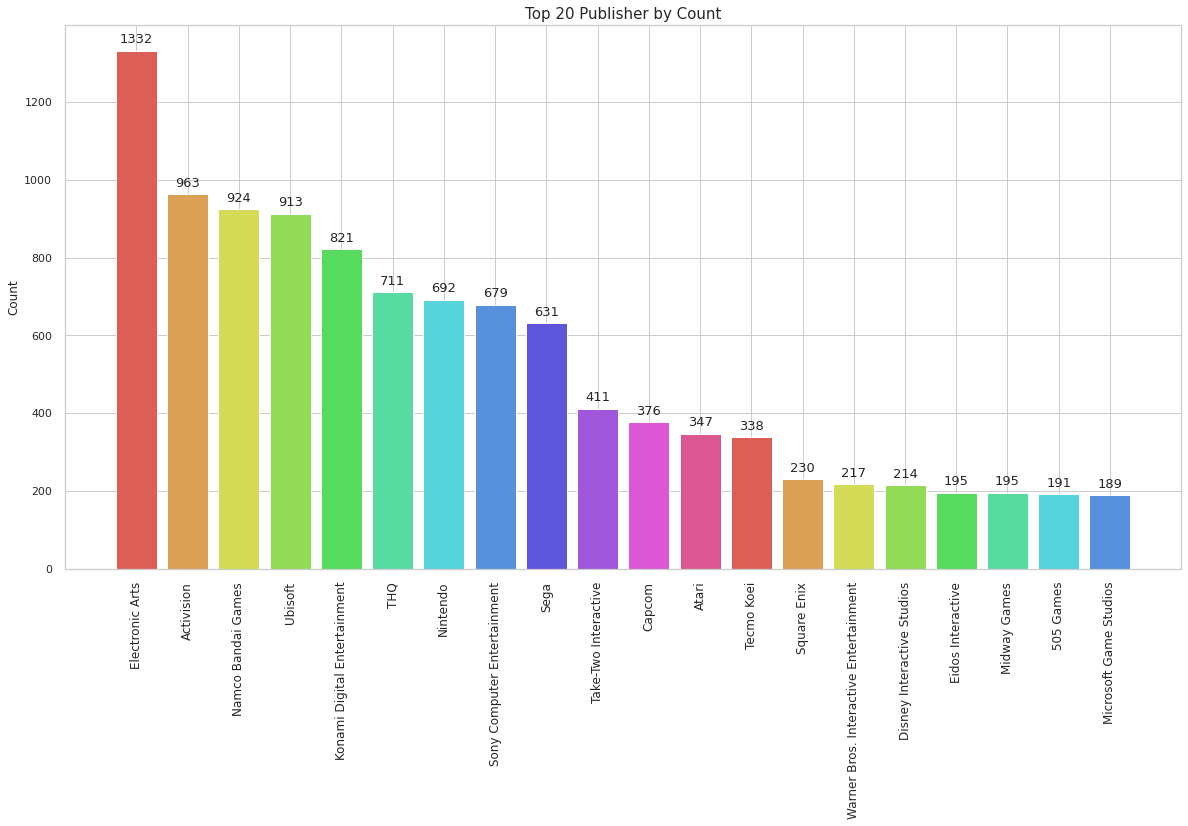

In [ ]:
plt.figure(figsize=(20, 10))
bar = plt.bar(x_top_publisher, y_top_publisher, color=colors)

for idx, rect in enumerate(bar):
  plt.text(idx, rect.get_height() + 20, y_top_publisher[idx], fontsize=13, ha='center')

plt.xticks(rotation=90, fontsize=12)
plt.title('Top 20 Publisher by Count', fontsize=15)
plt.ylabel('Count')
plt.show()

In [ ]:
sales_publisher = gd1.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(20)
x_total_publisher = sales_publisher.index
y_total_publisher = sales_publisher.values

print(x_total_publisher)
print(y_total_publisher)

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'THQ',
       'Konami Digital Entertainment', 'Sega', 'Namco Bandai Games',
       'Microsoft Game Studios', 'Capcom', 'Atari',
       'Warner Bros. Interactive Entertainment', 'Square Enix',
       'Disney Interactive Studios', 'Eidos Interactive', 'LucasArts',
       'Bethesda Softworks', 'Midway Games'],
      dtype='object', name='publisher')
[1759579992 1087179992  719359998  603579994  472699998  398569997
  340179999  277889998  269560000  252799999  245780000  199810000
  146459999  142339999  138840000  118510000   96600000   84910000
   81449999   68630000]


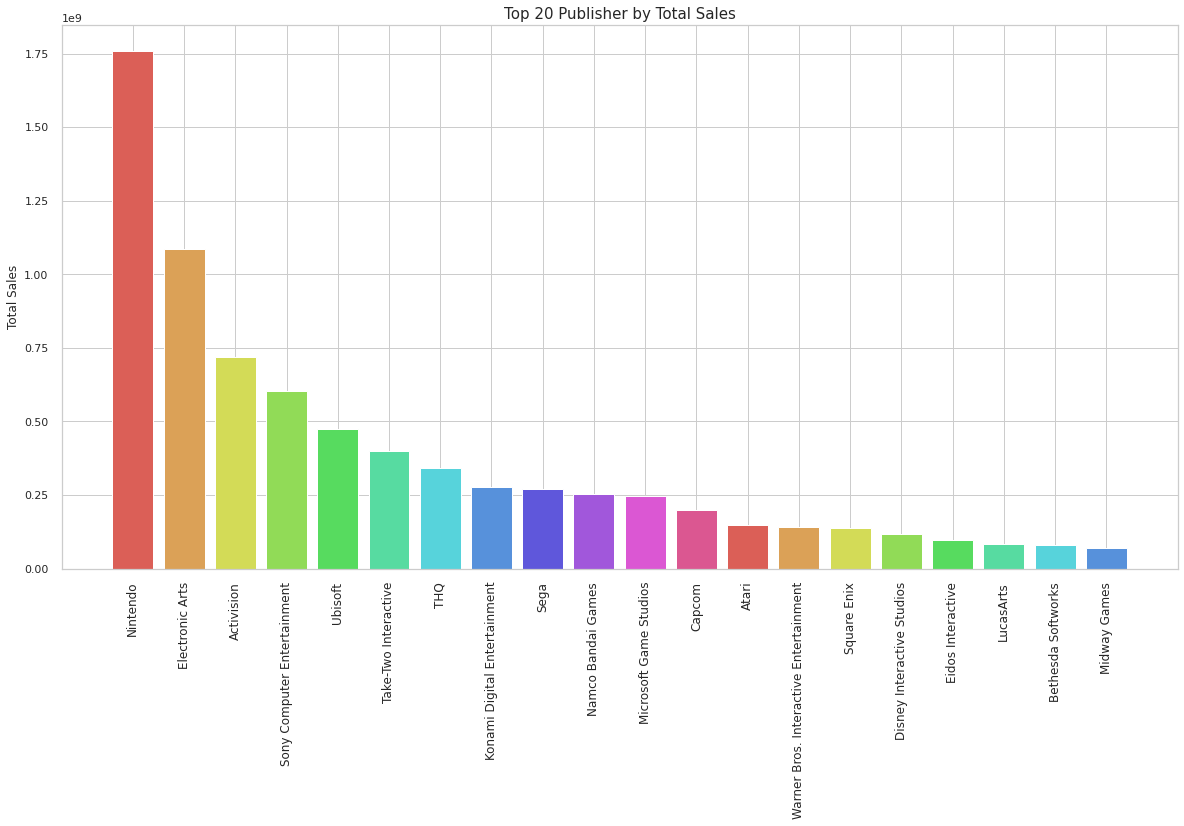

In [ ]:
plt.figure(figsize=(20, 10))
bar_s = plt.bar(x_total_publisher, y_total_publisher, color=colors)

plt.xticks(rotation=90, fontsize=12)
plt.title('Top 20 Publisher by Total Sales', fontsize=15)
plt.ylabel('Total Sales')
plt.show()

In [ ]:
gd1.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000


In [ ]:
# na_sales
publisher_na = gd1.groupby('publisher')['na_sales'].sum().sort_values(ascending=False).head(10)
x_publisher_na = publisher_na.index
y_publisher_na = publisher_na.values

# eu_sales
publisher_eu = gd1.groupby('publisher')['eu_sales'].sum().sort_values(ascending=False).head(10)
x_publisher_eu = publisher_eu.index
y_publisher_eu = publisher_eu.values

# jp_sales
publisher_jp = gd1.groupby('publisher')['jp_sales'].sum().sort_values(ascending=False).head(10)
x_publisher_jp = publisher_jp.index
y_publisher_jp = publisher_jp.values

# other_sales
publisher_other = gd1.groupby('publisher')['other_sales'].sum().sort_values(ascending=False).head(10)
x_publisher_other = publisher_other.index
y_publisher_other = publisher_other.values


# print(x_publisher_na)
# print(x_publisher_eu)
# print(x_publisher_jp)
# print(x_publisher_other)

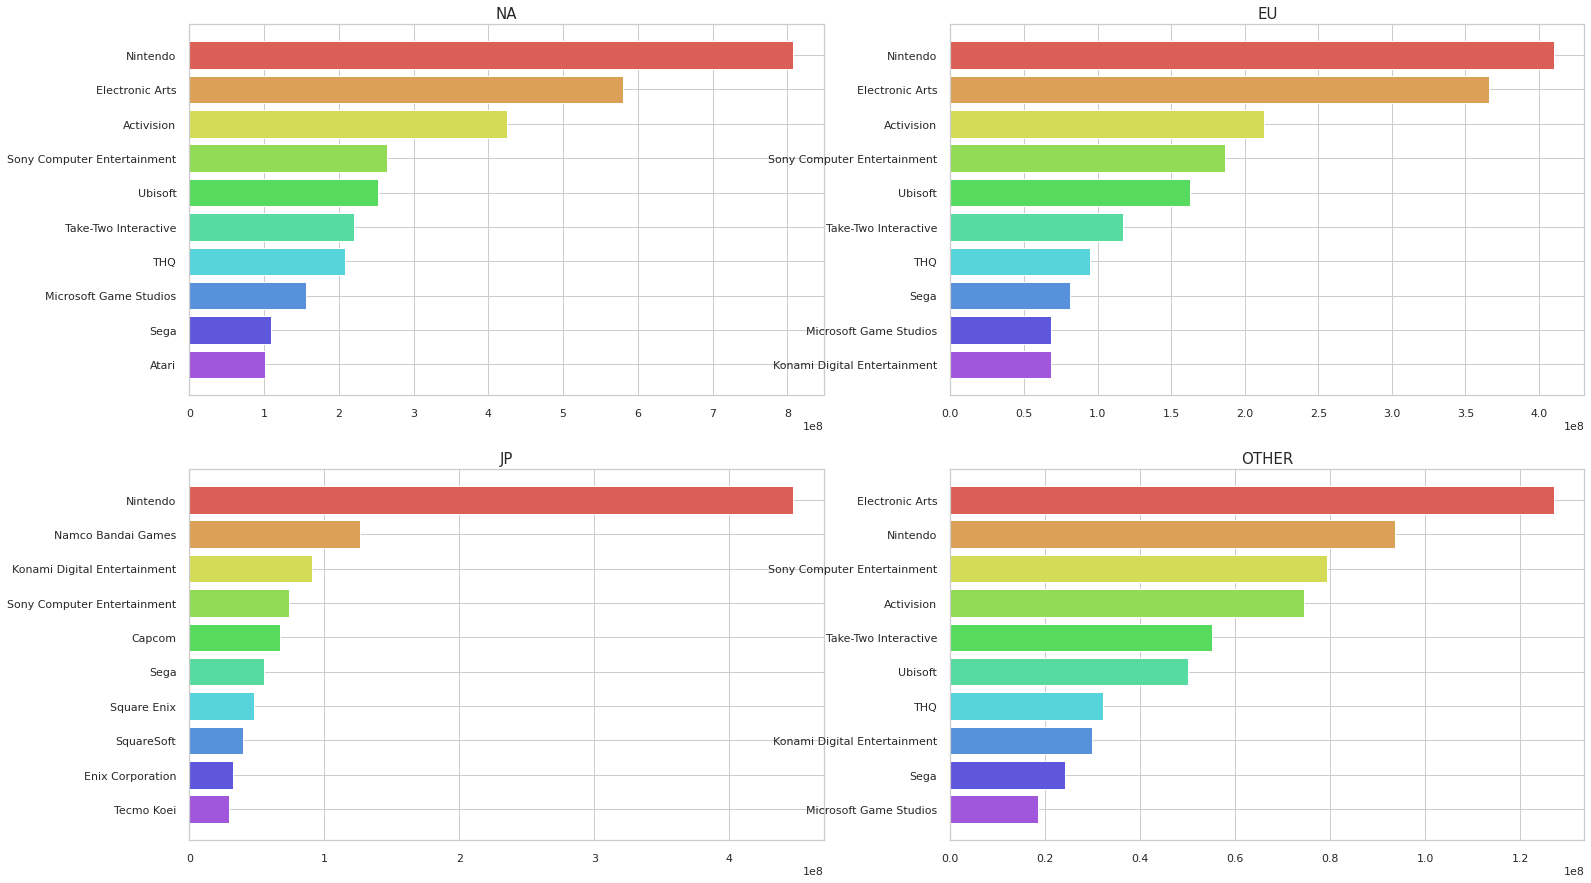

In [ ]:
# 각 나라별 게임회사 Top 10 이름

# 4분할 차트
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# NA
axs[0, 0].barh(x_publisher_na, y_publisher_na, color=colors)
axs[0, 0].set_title('NA', fontsize=15)
axs[0, 0].invert_yaxis()

# EU
axs[0, 1].barh(x_publisher_eu, y_publisher_eu, color=colors)
axs[0, 1].set_title('EU', fontsize=15)
axs[0, 1].invert_yaxis()

# JP
axs[1, 0].barh(x_publisher_jp, y_publisher_jp, color=colors)
axs[1, 0].set_title('JP', fontsize=15)
axs[1, 0].invert_yaxis()

# OTHER
axs[1, 1].barh(x_publisher_other, y_publisher_other, color=colors)
axs[1, 1].set_title('OTHER', fontsize=15)
axs[1, 1].invert_yaxis()

plt.show()

In [ ]:
# na_sales
publisher_na = gd1['na_sales'].sum()
# x_publisher_na = publisher_na.index
# y_publisher_na = publisher_na.values

# eu_sales
publisher_eu = gd1['eu_sales'].sum()
# x_publisher_eu = publisher_eu.index
# y_publisher_eu = publisher_eu.values

# jp_sales
publisher_jp = gd1['jp_sales'].sum()
# x_publisher_jp = publisher_jp.index
# y_publisher_jp = publisher_jp.values

# other_sales
publisher_other = gd1['other_sales'].sum()
# x_publisher_other = publisher_other.index
# y_publisher_other = publisher_other.values


print(publisher_na)
print(publisher_eu)
print(publisher_jp)
print(publisher_other)

4307039979
2393569988
1271389997
783369996


In [ ]:
region = gd1[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
region = region.sum()
x_region = region.index
y_region = region.values

labels = region.index
size = region.values

print(x_region)
print(y_region)

Index(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')
[4307039979 2393569988 1271389997  783369996]


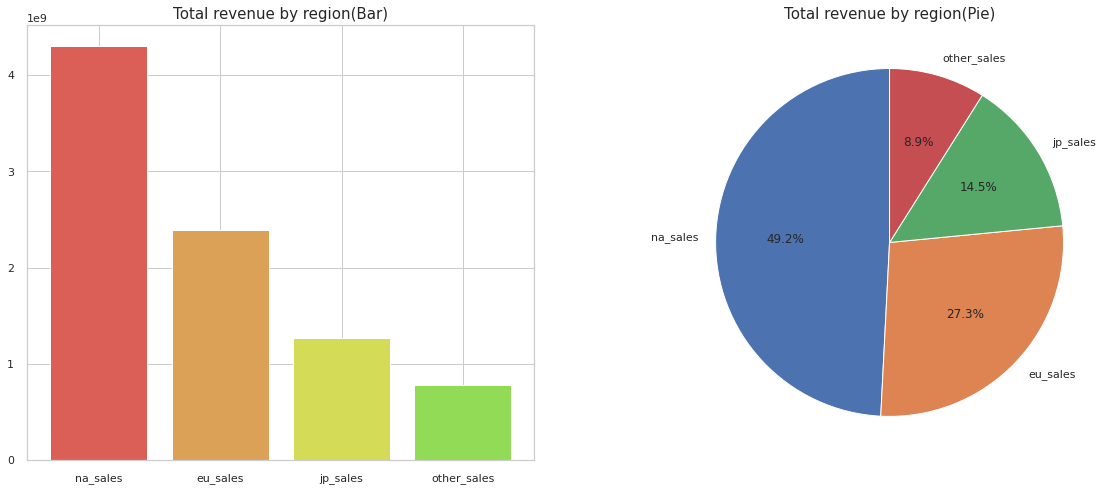

In [ ]:
plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# NA
axs1.bar(x_region, y_region, color=colors)
axs1.set_title('Total revenue by region(Bar)', fontsize=15)

# EU
axs2.pie(size, labels=labels, autopct='%.1f%%', startangle=90)
axs2.set_title('Total revenue by region(Pie)', fontsize=15)

plt.show()

In [ ]:
x_year_top = gd1.sort_values(by='total_sales', ascending=False)['year'].iloc[:20].values
y_year_top  = gd1.sort_values(by='total_sales', ascending=False)['total_sales'].iloc[:20].values
y_lim_1 = gd1.sort_values(by='total_sales', ascending=False)['year'].iloc[:20].values
y_1 = np.arange(0, 20)

print(x_year_top)
print(y_year_top)
print(y_lim_1)
print(y_1)

[2006 1985 2008 2009 1996 1989 2006 2006 2009 1984 2005 2005 1999 2007
 2009 2010 2013 2004 1990 2005]
[82740000 40240000 35830000 33000000 31380000 30260000 30010000 29010000
 28610000 28310000 24750000 23430000 23090000 22719999 22000000 21820000
 21389999 20810000 20620000 20219999]
[2006 1985 2008 2009 1996 1989 2006 2006 2009 1984 2005 2005 1999 2007
 2009 2010 2013 2004 1990 2005]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Int64Index([2009, 2008, 2010, 2007, 2011, 2006, 2005, 2002, 2003, 2004, 2012,
            2015, 2014, 2013, 2001, 1998, 2000, 2016, 1999, 1997, 1996, 1995,
            1994, 1993, 1981, 1992, 1991, 1982, 1986, 1989, 1983, 1987, 1990,
            1988, 1985, 1984, 1980, 2017, 2020],
           dtype='int64', name='year')


In [ ]:
# https://www.kaggle.com/code/amritachatterjee09/video-game-sales-eda-with-plotly/notebook

# na
na = gd1.pivot_table('na_sales', columns='publisher', aggfunc='sum').T
# print(na)
na_t = na.sort_values(by='na_sales', ascending=False).iloc[0:10]
# print(na_t)
x_na_pub = na_t.index
y_na_pub = na_t.values

# print(x_na_pub)
# print(y_na_pub)

# eu
eu = gd1.pivot_table('eu_sales', columns='publisher', aggfunc='sum').T
eu_t = eu.sort_values(by='eu_sales', ascending=False).iloc[0:10]
x_eu_pub = eu_t.index
y_eu_pub = eu_t.values

# jp
jp = gd1.pivot_table('jp_sales', columns='publisher', aggfunc='sum').T
jp_t = jp.sort_values(by='jp_sales', ascending=False).iloc[0:10]
x_jp_pub = jp_t.index
y_jp_pub = jp_t.values

print(jp_t)


# other
other = gd1.pivot_table('other_sales', columns='publisher', aggfunc='sum').T
other_t = other.sort_values(by='other_sales', ascending=False).iloc[0:10]
x_otner_pub = other_t.index
y_otner_pub = other_t.values

# total
total = gd1.pivot_table('total_sales', columns='publisher', aggfunc='sum').T
total_t = total.sort_values(by='total_sales', ascending=False).iloc[0:10]
x_total_pub = total_t.index
y_total_pub = total_t.values

                               jp_sales
publisher                              
Nintendo                      447429999
Namco Bandai Games            126699999
Konami Digital Entertainment   90930000
Sony Computer Entertainment    73720000
Capcom                         67380000
Sega                           55570000
Square Enix                    47460000
SquareSoft                     39440000
Enix Corporation               32399999
Tecmo Koei                     29210000


In [ ]:
# 각 나라별 (total 포함) 게임 회사 순위 (판매량)
fig = go.Figure()

# 버튼 내용
fig.add_trace(
    go.Bar(y=na_t['na_sales'],
           x=x_na_pub,
           name="North America",
          marker={'color': na_t['na_sales'],'colorscale': 'tealgrn'}))
fig.add_trace(
    go.Bar(y=eu_t['eu_sales'],
           x=x_eu_pub,
           name="Europe",
           marker={'color': eu_t['eu_sales'],'colorscale': 'tealgrn'},
           visible=False))
fig.add_trace(
    go.Bar(y=jp_t['jp_sales'],
           x=x_jp_pub,
           name="Japan",
           marker={'color': jp_t['jp_sales'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=other_t['other_sales'],
           x=x_otner_pub,
           name="Others",
           marker={'color': other_t['other_sales'],'colorscale': 'tealgrn'},
           visible=False))

fig.add_trace(
    go.Bar(y=total_t['total_sales'],
           x=x_total_pub,
           name="Global",
           marker={'color': total_t['total_sales'],'colorscale': 'tealgrn'},
               visible=False ))

buttons = []
countries = ['North America', 'Europe', 'Japan', 'Others', 'Global']
for i, country in enumerate(countries):
    buttons.append(dict(
        label=country,
        method="update",
        # 버튼 클릭 시 변경 
        # ([True, Fales, Fales, Fales, False])
        # ([Fales, True, Fales, Fales, False])
        # ([Fales, Fales, True, Fales, False])
        # ([Fales, Fales, Fales, True, False])
        # ([Fales, Fales, Fales, False, True])
        args=[{"visible": [False] * i + [True] + [False] * (3-i+1)},
              # sub title
              {"title": f"Top 5 Publishers by {country}"}]
    ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
          )
    ])

fig.update_layout(
    # sup title
    title_text="Top 5 Publishers by Region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()